In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import json
import warnings

In [2]:
df= pd.read_csv("laptop_data.csv")
print(df.shape)
df

(1303, 12)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# dropping the index row 
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
# preprocessing the ram and weight columns
df['Ram']= df['Ram'].str.replace('GB', '')
df['Weight']= df['Weight'].str.replace('kg', '')
df['Ram']= df['Ram'].astype('int32')
df['Weight']= df['Weight'].astype('float32')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# EDA, DATA CLEANING AND PREPROCESSING

In [10]:
# warnings.filterwarnings("ignore")

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\3463292440.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


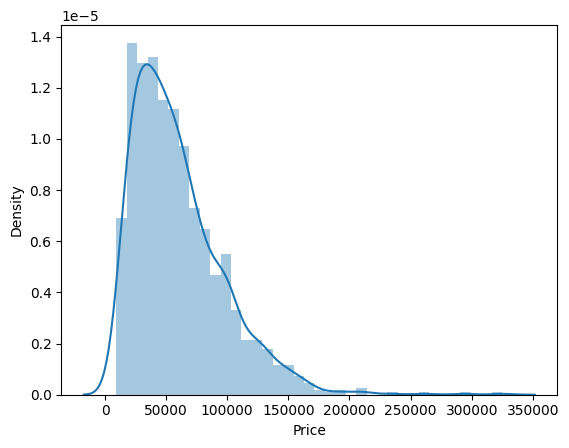

In [11]:
sns.distplot(df['Price'])
# plt.grid()
plt.show()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64


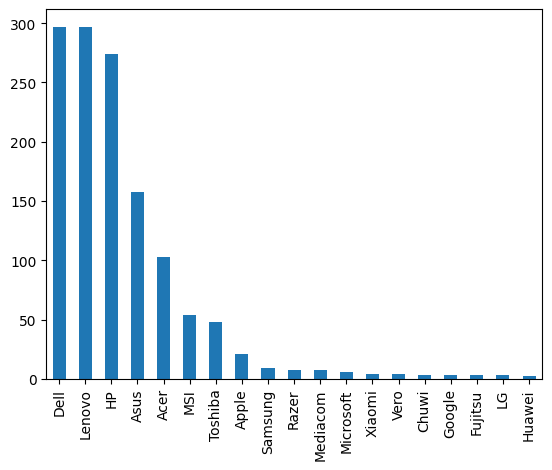

In [12]:
print(df['Company'].value_counts())
df['Company'].value_counts().plot(kind='bar')
# plt.grid()
plt.show()

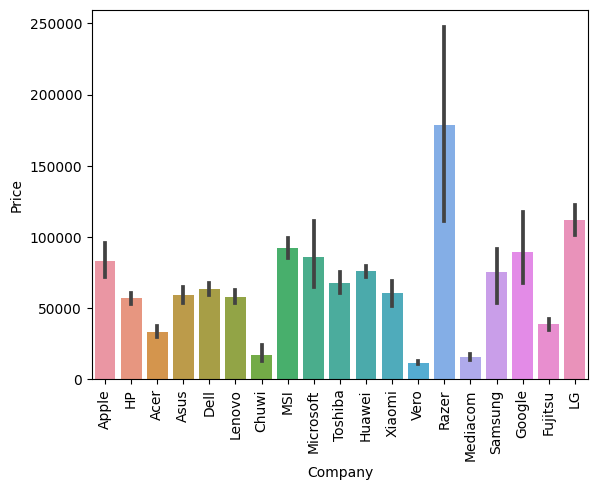

In [13]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64


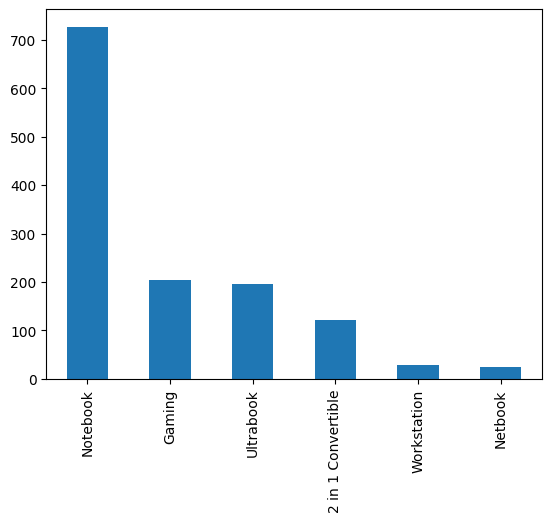

In [14]:
print(df['TypeName'].value_counts())
df['TypeName'].value_counts().plot(kind='bar')
plt.show()

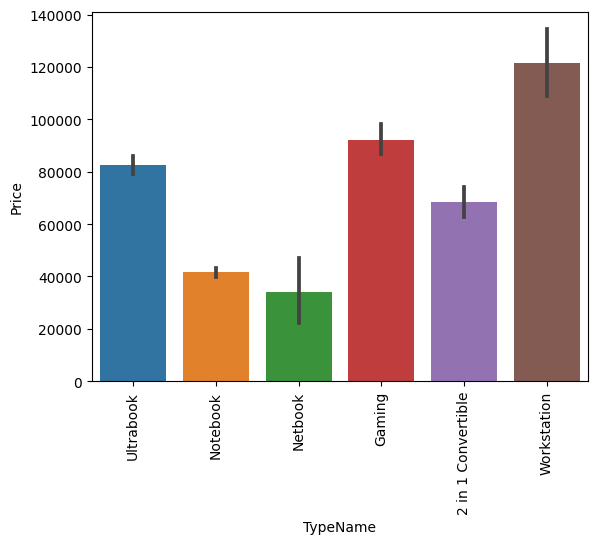

In [15]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\3809510925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


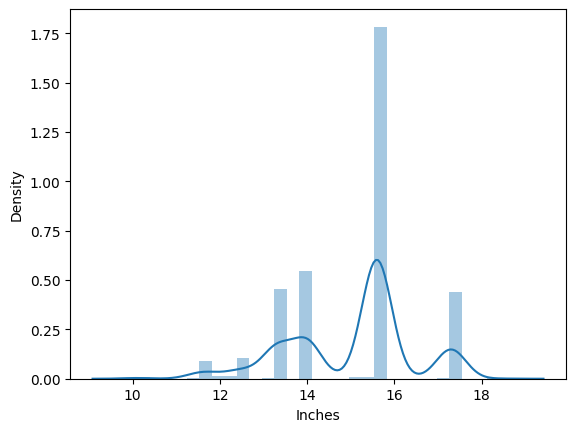

In [16]:
sns.distplot(df['Inches'])
plt.show()

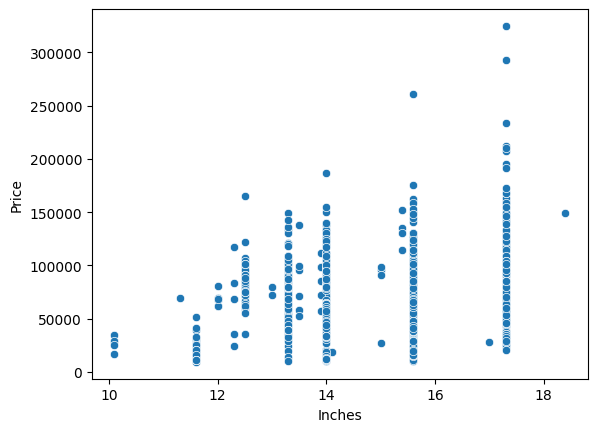

In [17]:
# here we can observe that there is not a very strong correlation but neverthless we can see
# that ssmaller screen size laptops have les price compared to laptops haoving bigger screens
sns.scatterplot(x=df['Inches'], y=df['Price'])
plt.show()

In [18]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [19]:
# now as we observe above there are laptops with touscreen so lets make a feature 
df['Touchscreen']= df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in str(x).split(" ") else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
873,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,180GB SSD,Intel HD Graphics 620,Windows 10,1.44,39160.8000,0
883,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.20,35644.3200,0
133,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,256GB SSD,Nvidia GeForce MX130,Windows 10,2.20,30476.1600,0
916,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,51148.8000,0
638,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.37,93635.3376,1


0    1111
1     192
Name: Touchscreen, dtype: int64


<AxesSubplot: >

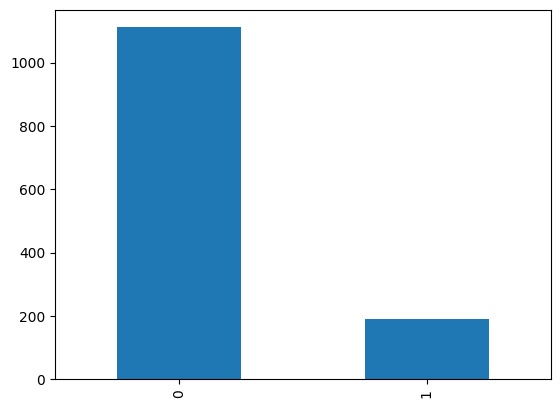

In [20]:
print(df['Touchscreen'].value_counts())
df['Touchscreen'].value_counts().plot(kind="bar")

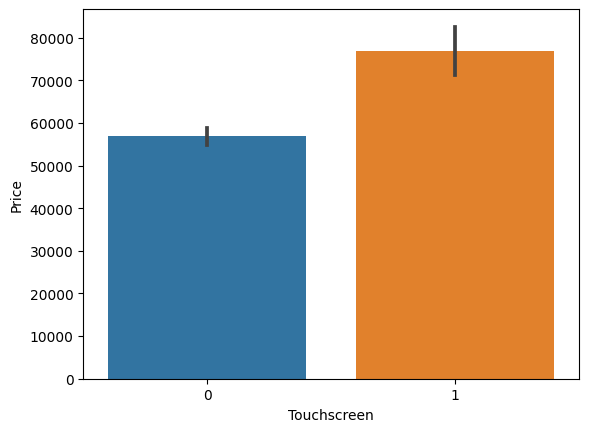

In [21]:
# we can clearly observe that the touchscreeen laptops have more price than non touchscreeen laptops
sns.barplot(x=df['Touchscreen'], y=df['Price'])
plt.show()

In [22]:
df['IPS']= df['ScreenResolution'].apply(lambda x:1 if 'IPS' in str(x).split(" ") else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
619,Acer,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,20193.12,1,1
407,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,512GB SSD,Intel HD Graphics,Windows 10,1.36,89510.40,0,0
156,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.74,33513.12,1,1
82,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.63,45820.80,0,0
947,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 920MX,No OS,2.20,36496.80,0,0


0    938
1    365
Name: IPS, dtype: int64


<AxesSubplot: >

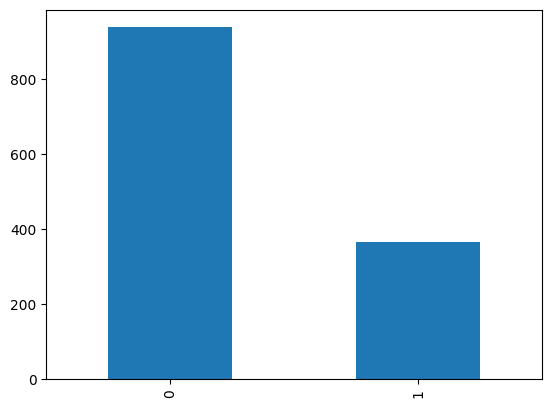

In [23]:
# figuring out which laptops have ips panel
print(df['IPS'].value_counts())
df['IPS'].value_counts().plot(kind="bar")

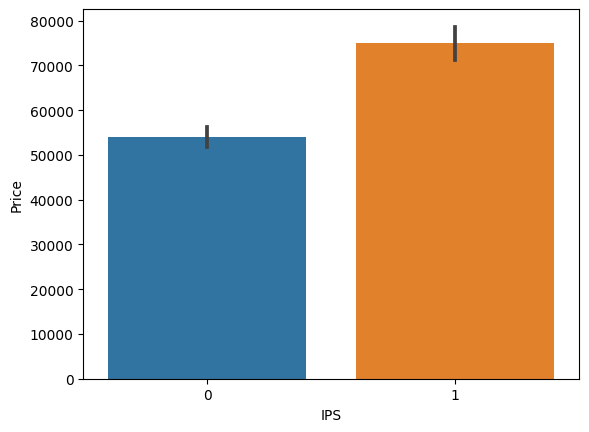

In [24]:
# we can clearly observe that the IPS panel laptops have more price than non touchscreeen laptops
sns.barplot(x=df['IPS'], y=df['Price'])
plt.show()

In [25]:
df['Res_width']= df['ScreenResolution'].apply(lambda x:str(x).split(" ")[-1].split("x")[0])
df['Res_height']= df['ScreenResolution'].apply(lambda x:str(x).split(" ")[-1].split("x")[1])
df['Res_width']= df['Res_width'].astype('int32')
df['Res_height']= df['Res_height'].astype('int32')
print(df.shape)
df.sample(5)

(1303, 15)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height
899,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,49816.80,0,0,1920,1080
108,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,69210.72,0,0,1920,1080
705,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,42357.60,0,0,1920,1080
848,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,121318.56,1,0,1920,1080
783,Lenovo,Notebook,15.6,1366x768,Intel Celeron Quad Core N3710 1.6GHz,8,1TB HDD,Intel HD Graphics 405,No OS,2.20,17529.12,0,0,1366,768


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Res_width         1303 non-null   int32  
 14  Res_height        1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [27]:
# making a new feature for ppi (pixel per inches)
def ppi(width, height, inches):
    return ((width**2 + height**2))**0.5 / inches 

In [28]:
df['PPI']= ppi(df['Res_width'], df['Res_height'], df['Inches'])
df['PPI']= df['PPI'].astype('float32')
print(df.shape)
df.sample(5)

(1303, 16)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI
365,HP,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,2.04,20725.92,0,0,1366,768,100.454666
1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.12,0,1,1920,1080,165.632111
672,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.30,55091.52,1,1,1920,1080,165.632111
1122,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,80612.64,0,0,1920,1080,157.350510
564,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,44701.92,0,0,1920,1080,141.212006


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Res_width         1303 non-null   int32  
 14  Res_height        1303 non-null   int32  
 15  PPI               1303 non-null   float32
dtypes: float32(2), float64(2), int32(3), int64

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\1222846780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PPI'])


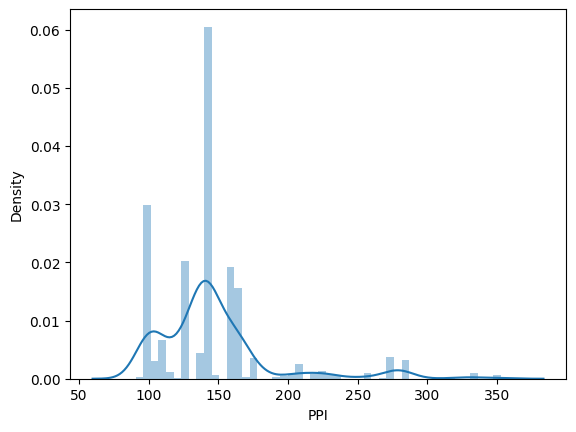

In [30]:
sns.distplot(df['PPI'])
plt.show()

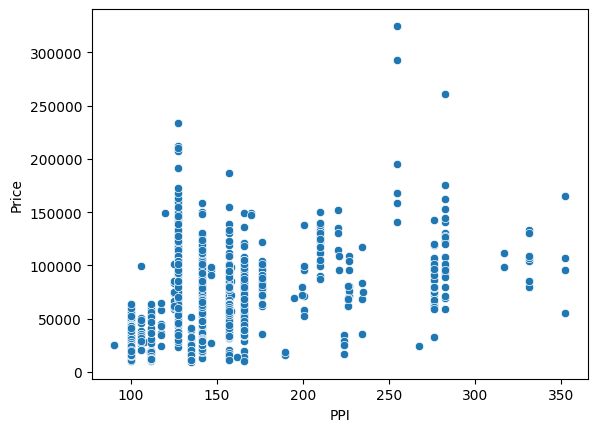

In [31]:
sns.scatterplot(x= df['PPI'], y=df['Price'])
plt.show()

In [32]:
df['Retina']= df['ScreenResolution'].apply(lambda x:1 if 'Retina' in str(x).split(" ") else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina
971,Dell,Ultrabook,14.0,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.50,104587.5744,1,0,2560,1440,209.800690,0
333,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,1.85,23922.7200,0,0,1920,1080,141.212006,0
1167,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,24935.0400,0,0,1920,1080,141.212006,0
885,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,95850.7200,1,0,1920,1080,165.632111,0
231,HP,Notebook,15.6,1366x768,AMD E-Series 9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,Windows 10,2.10,17582.4000,0,0,1366,768,100.454666,0


0    1286
1      17
Name: Retina, dtype: int64


<AxesSubplot: >

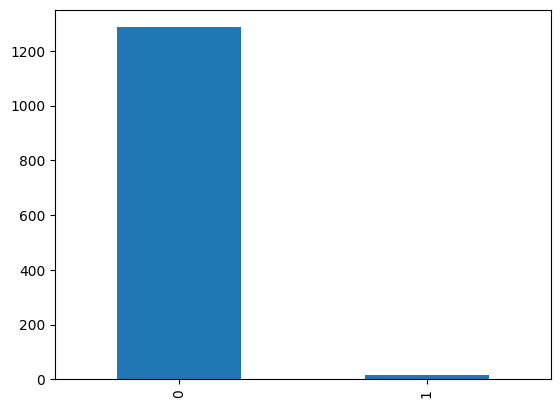

In [33]:
print(df['Retina'].value_counts())
df['Retina'].value_counts().plot(kind="bar")

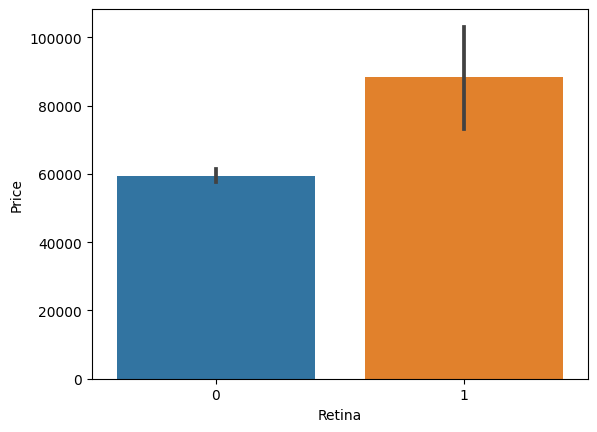

In [34]:
# we can clearly observe that retina display laptops has high price as they belong to apple 
sns.barplot(x=df['Retina'], y=df['Price'])
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Res_width         1303 non-null   int32  
 14  Res_height        1303 non-null   int32  
 15  PPI               1303 non-null   float32
 16  Retina            1303 non-null   int64  


In [36]:
# now we have processed the screenresolution column lets drop that column
df.drop(columns=['ScreenResolution'], inplace=True)

In [37]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.212006,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534622,1
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983002,1


In [38]:
# now lets handle the cpu 
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [39]:
df['Cpu'].apply(lambda x:str(x).split(" ")[:3]).value_counts()

[Intel, Core, i7]               527
[Intel, Core, i5]               423
[Intel, Core, i3]               136
[Intel, Celeron, Dual]           80
[Intel, Pentium, Quad]           27
[Intel, Core, M]                 19
[AMD, A9-Series, 9420]           12
[Intel, Celeron, Quad]            8
[AMD, A6-Series, 9220]            8
[AMD, A12-Series, 9720P]          7
[Intel, Atom, x5-Z8350]           5
[AMD, A8-Series, 7410]            4
[Intel, Atom, x5-Z8550]           4
[Intel, Pentium, Dual]            3
[AMD, A9-Series, 9410]            3
[AMD, Ryzen, 1700]                3
[AMD, A9-Series, A9-9420]         2
[AMD, A10-Series, 9620P]          2
[Intel, Atom, X5-Z8350]           2
[AMD, E-Series, E2-9000e]         2
[Intel, Xeon, E3-1535M]           2
[Intel, Xeon, E3-1505M]           2
[AMD, E-Series, 7110]             2
[AMD, A10-Series, 9600P]          2
[AMD, A6-Series, A6-9220]         2
[AMD, A10-Series, A10-9620P]      2
[AMD, Ryzen, 1600]                1
[Intel, Atom, x5-Z8300]     

In [40]:
df['Cpu_brand']= df['Cpu'].apply(lambda x:"".join(str(x).split(" ")[0]))
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002,1,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.212006,0,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534622,1,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983002,1,Intel


Intel      1240
AMD          62
Samsung       1
Name: Cpu_brand, dtype: int64


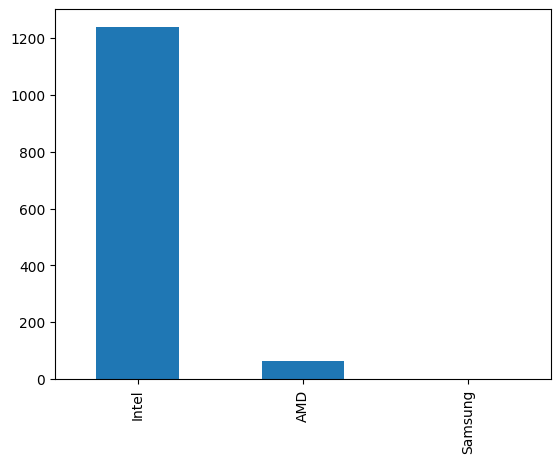

In [41]:
print(df['Cpu_brand'].value_counts())
df['Cpu_brand'].value_counts().plot(kind="bar")
plt.show()

In [42]:
df[df['Cpu_brand']=='Samsung']

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_brand
1191,Samsung,2 in 1 Convertible,12.3,Samsung Cortex A72&A53 2.0GHz,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,2400,1600,234.507401,0,Samsung


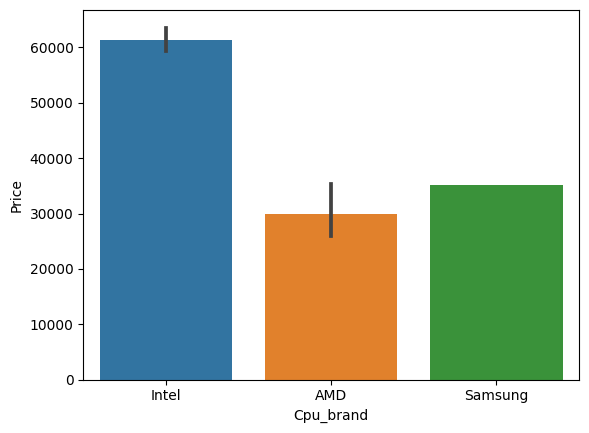

In [43]:
# we can observe that intel cpu laptops have generally higher costs than amd laptops
# and there is only one laptop with samsung processor
sns.barplot(x=df['Cpu_brand'], y=df['Price'])
plt.show()

In [44]:
# here we observe that there is only one laptop with samsung cpu which does not hep so remove it
df= df[df['Cpu_brand']!="Samsung"]
print(df.shape)
df.head()

(1302, 17)


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002,1,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.212006,0,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534622,1,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983002,1,Intel


In [45]:
df['Cpu_name']= df['Cpu'].apply(lambda x:" ".join(str(x).split(" ")[0:3]))
df.head()

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\1379655130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu_name']= df['Cpu'].apply(lambda x:" ".join(str(x).split(" ")[0:3]))


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_brand,Cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002,1,Intel,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0,Intel,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.212006,0,Intel,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534622,1,Intel,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983002,1,Intel,Intel Core i5


In [46]:
def fetch_cpu_type(text):
    text_list=text.split(" ")
    if text_list[0]=="Intel":
        return " ".join(text_list[:-1])
    elif text_list[0]=="AMD" and text_list[1][0]=="A":
        return "AMD A-Series"
    elif text_list[0]=="AMD":
        return " ".join(text_list[:-1])
    elif text_list[0]=="Samsung":
        return " ".join(text_list[:-1])

In [47]:
df['Cpu_type']= df['Cpu_name'].apply(fetch_cpu_type)
df.sample(5)

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\891642885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu_type']= df['Cpu_name'].apply(fetch_cpu_type)


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_brand,Cpu_name,Cpu_type
1249,Dell,2 in 1 Convertible,13.3,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.24,96596.640,1,0,3200,1800,276.053528,0,Intel,Intel Core i5,Intel Core
355,Dell,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,51729.552,0,0,1920,1080,141.212006,0,Intel,Intel Core i7,Intel Core
352,MSI,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,75071.520,0,0,1920,1080,127.335678,0,Intel,Intel Core i7,Intel Core
455,Dell,2 in 1 Convertible,11.6,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics 405,Windows 10,1.47,25521.120,1,0,1366,768,135.094208,0,Intel,Intel Pentium Quad,Intel Pentium
828,Acer,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35,18914.400,0,1,1366,768,135.094208,0,Intel,Intel Celeron Dual,Intel Celeron


Intel Core       1105
Intel Celeron      88
AMD A-Series       47
Intel Pentium      30
Intel Atom         13
AMD E-Series        9
AMD Ryzen           4
Intel Xeon          4
AMD FX              2
Name: Cpu_type, dtype: int64


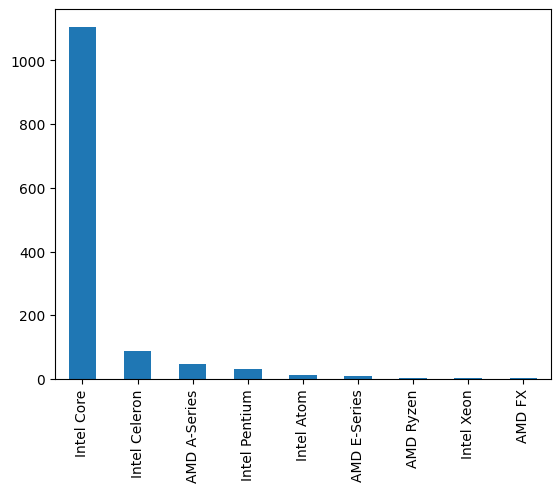

In [48]:
print(df['Cpu_type'].value_counts())
df['Cpu_type'].value_counts().plot(kind="bar")
plt.show()

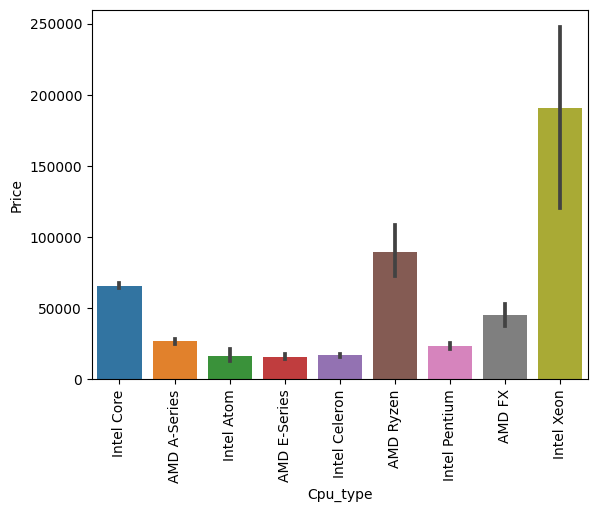

In [49]:
sns.barplot(x=df['Cpu_type'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

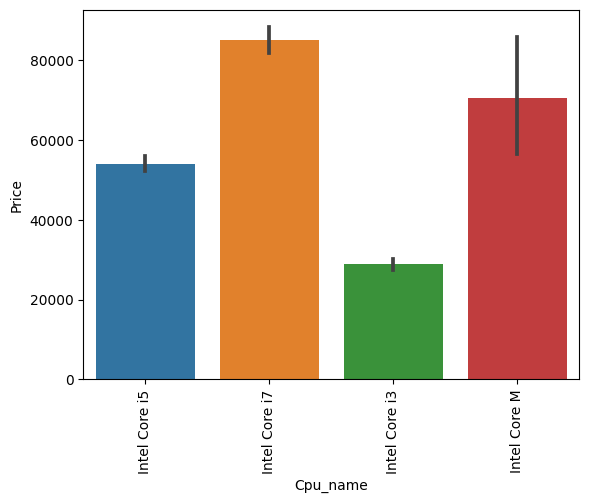

In [50]:
x= sns.barplot(x= df['Cpu_name'][df['Cpu_type']=='Intel Core'], y= df['Price'][df['Cpu_type']=='Intel Core'])
plt.xticks(rotation=90)
plt.show()

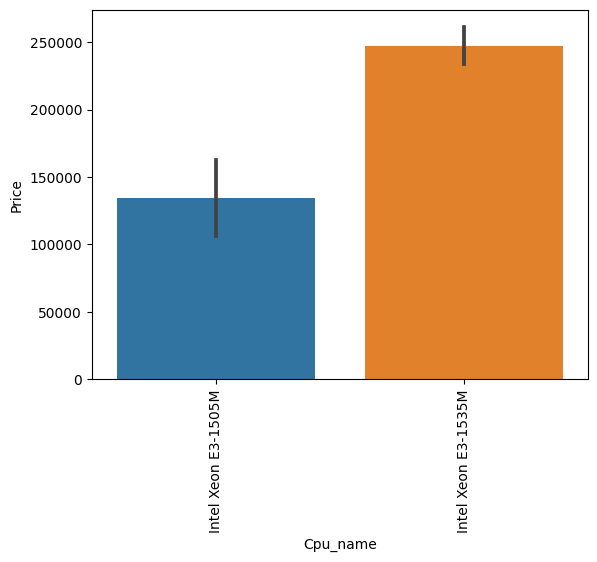

In [51]:
x= sns.barplot(x= df['Cpu_name'][df['Cpu_type']=='Intel Xeon'], y= df['Price'][df['Cpu_type']=='Intel Xeon'])
plt.xticks(rotation=90)
plt.show()

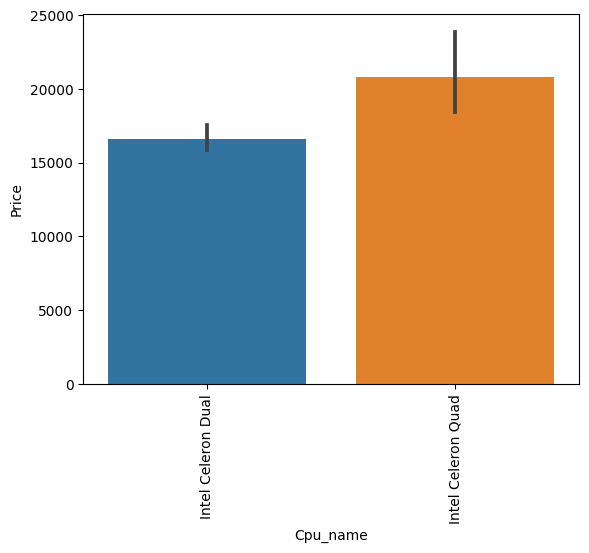

In [52]:
x= sns.barplot(x= df['Cpu_name'][df['Cpu_type']=='Intel Celeron'], y= df['Price'][df['Cpu_type']=='Intel Celeron'])
plt.xticks(rotation=90)
plt.show()

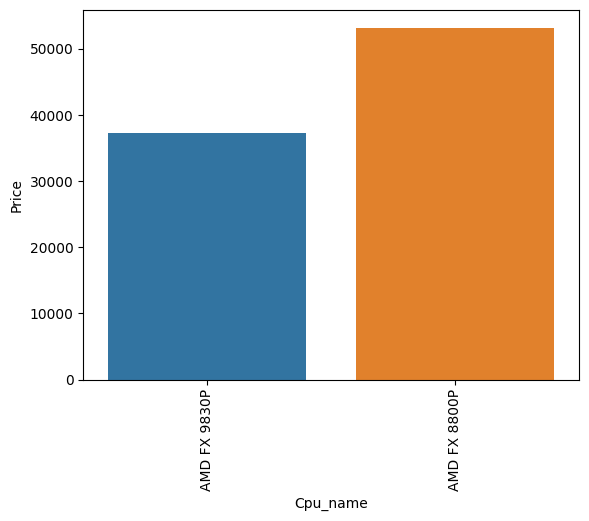

In [53]:
x= sns.barplot(x= df['Cpu_name'][df['Cpu_type']=='AMD FX'], y= df['Price'][df['Cpu_type']=='AMD FX'])
plt.xticks(rotation=90)
plt.show()

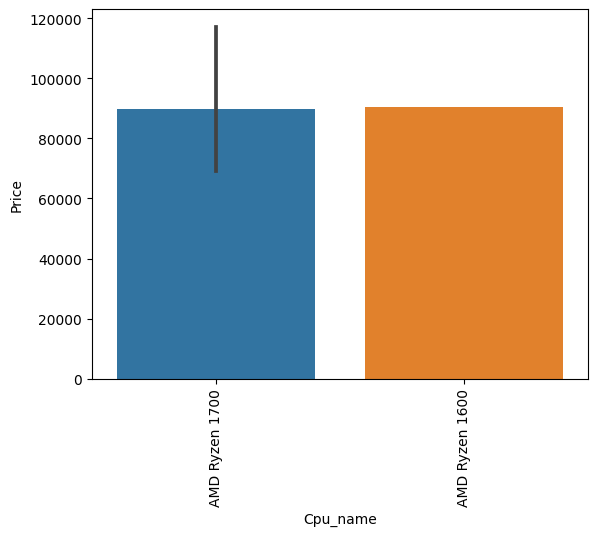

In [54]:
x= sns.barplot(x= df['Cpu_name'][df['Cpu_type']=='AMD Ryzen'], y= df['Price'][df['Cpu_type']=='AMD Ryzen'])
plt.xticks(rotation=90)
plt.show()

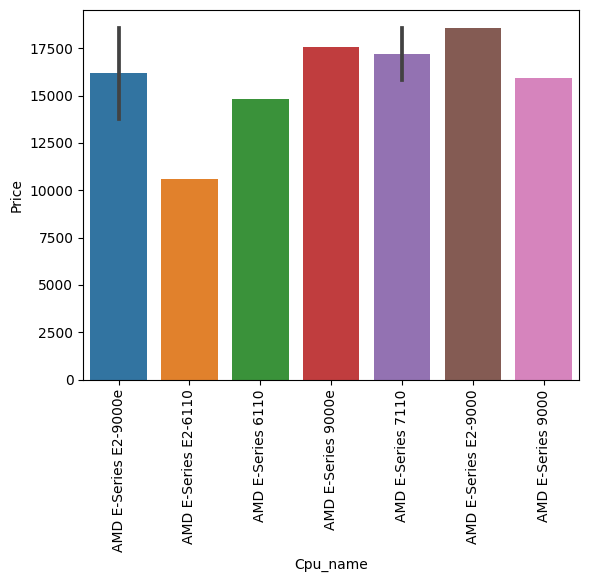

In [55]:
x= sns.barplot(x= df['Cpu_name'][df['Cpu_type']=='AMD E-Series'], y= df['Price'][df['Cpu_type']=='AMD E-Series'])
plt.xticks(rotation=90)
plt.show()

In [56]:
# fom the above plot we notice that intel xeon is the most costly processor
# so lets keep categories like intel core (i3, i5, i7, M), intel xeon, other intel 
# AMD ryzen, other amd
# samsung processors are combined with AMD processors as they have the same price range

In [57]:
def fetch_cpu_name(text):
    text_list=text.split(" ")
    if text=="Intel Core i3" or text=="Intel Core i5" or text=="Intel Core i7" or text=="Intel Core M":
        return text
    elif text_list[1]=="Xeon":
        return "Intel Xeon"
    elif text_list[1]=="Ryzen":
        return "AMD Ryzen"
    elif text_list[0]=="Intel":
        return "other Intel processors"
    else:
        return "other AMD processors"

In [58]:
df['Cpu_name']= df["Cpu_name"].apply(fetch_cpu_name)
df.head(5)

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\3245773142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu_name']= df["Cpu_name"].apply(fetch_cpu_name)


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_brand,Cpu_name,Cpu_type
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002,1,Intel,Intel Core i5,Intel Core
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0,Intel,Intel Core i5,Intel Core
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.212006,0,Intel,Intel Core i5,Intel Core
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534622,1,Intel,Intel Core i7,Intel Core
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983002,1,Intel,Intel Core i5,Intel Core


Intel Core i7             527
Intel Core i5             423
Intel Core i3             136
other Intel processors    131
other AMD processors       58
Intel Core M               19
AMD Ryzen                   4
Intel Xeon                  4
Name: Cpu_name, dtype: int64


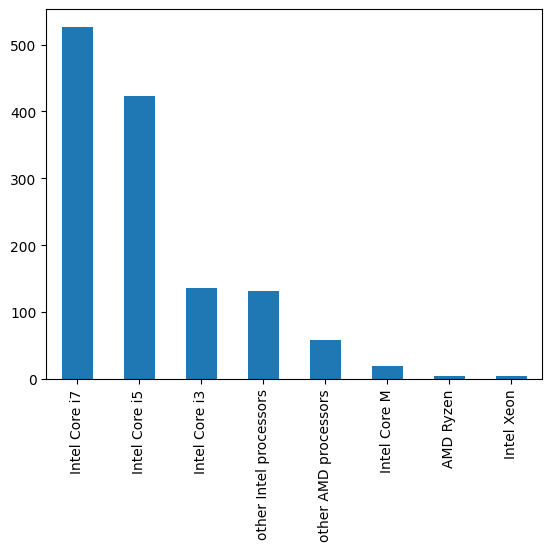

In [59]:
print(df['Cpu_name'].value_counts())
df['Cpu_name'].value_counts().plot(kind="bar")
plt.show()

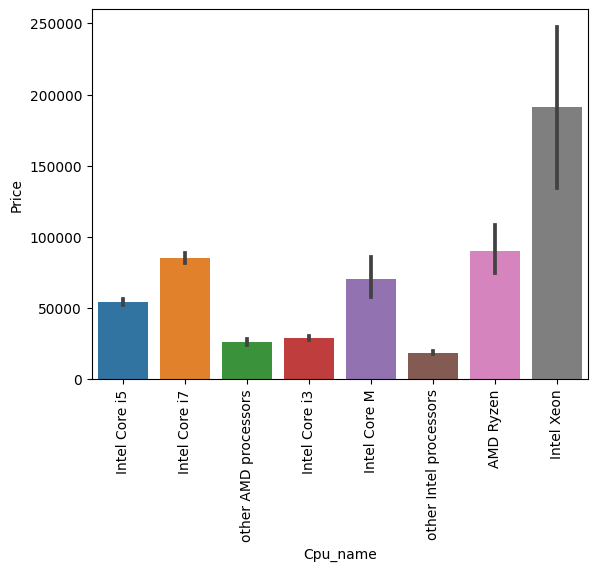

In [60]:
sns.barplot(x=df['Cpu_name'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [61]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_brand,Cpu_name,Cpu_type
886,Dell,Notebook,15.6,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Linux,2.18,24279.696,0,0,1366,768,100.454666,0,Intel,Intel Core i3,Intel Core
364,Lenovo,Notebook,15.6,Intel Core i3 6006U 2GHz,8,256GB SSD,Nvidia GeForce 920MX,No OS,2.20,26586.720,0,0,1366,768,100.454666,0,Intel,Intel Core i3,Intel Core
221,Lenovo,2 in 1 Convertible,14.0,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.74,47898.720,0,1,1920,1080,157.350510,0,Intel,Intel Core i5,Intel Core
1167,Lenovo,Notebook,15.6,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,24935.040,0,0,1920,1080,141.212006,0,Intel,Intel Core i3,Intel Core
776,Lenovo,Notebook,15.6,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro M2000M,Windows 7,2.50,126273.600,0,0,3840,2160,282.424011,0,Intel,Intel Core i7,Intel Core


In [62]:
# Finally dropping the other cpu columns and only keeping the cpu_name column
df.drop(columns=['Cpu_brand', 'Cpu_type'], inplace=True)
df.sample(5)

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\3370045378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Cpu_brand', 'Cpu_type'], inplace=True)


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_name
510,Dell,Ultrabook,13.3,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.29,47898.7200,1,1,1920,1080,165.632111,0,Intel Core i5
117,Dell,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.16,60223.9824,0,1,1920,1080,141.212006,0,Intel Core i7
806,Toshiba,Notebook,15.6,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,41558.4000,0,0,1366,768,100.454666,0,Intel Core i5
1139,HP,Ultrabook,15.6,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.88,115709.2416,0,0,1920,1080,141.212006,0,Intel Core i7
574,Lenovo,Notebook,15.6,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.05,36496.8000,0,0,1920,1080,141.212006,0,Intel Core i5


In [63]:
# now getting the clock speed from the cpu column
df['Cpu_clock_speed']= df['Cpu'].apply(lambda x:str(x).split(" ")[-1][:-3]).astype("float32")
df.head()

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\761784117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu_clock_speed']= df['Cpu'].apply(lambda x:str(x).split(" ")[-1][:-3]).astype("float32")


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_name,Cpu_clock_speed
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002,1,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0,Intel Core i5,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.212006,0,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534622,1,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983002,1,Intel Core i5,3.1


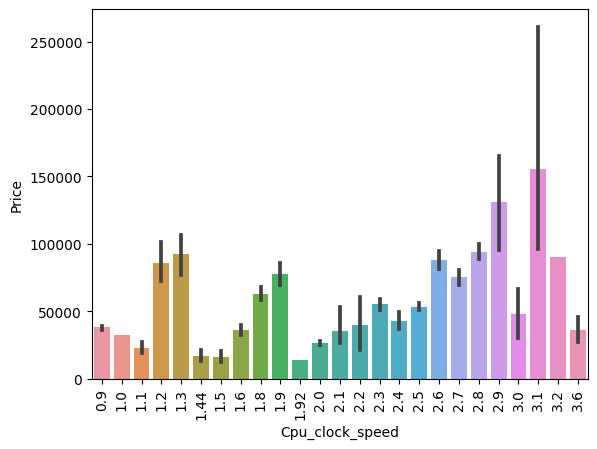

In [64]:
# you can see that the higher clock speeds generallly have higher price
sns.barplot(x=df['Cpu_clock_speed'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='Cpu_clock_speed', ylabel='Price'>

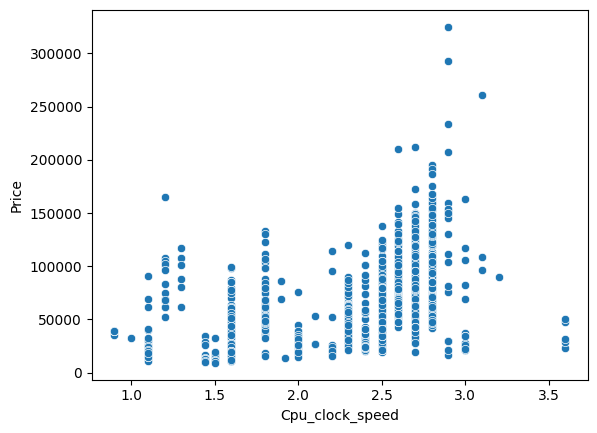

In [65]:
sns.scatterplot(x= df['Cpu_clock_speed'], y= df['Price'])

In [66]:
# now the whole cpu column is processed so drop the column
df.drop(columns=['Cpu'], inplace=True)
df.sample(5)

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\1833166546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Cpu'], inplace=True)


,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_name,Cpu_clock_speed
498,Lenovo,Notebook,13.3,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,50562.7200,0,1,1920,1080,165.632111,0,Intel Core i3,2.4
226,Dell,Notebook,15.6,16,1TB HDD,AMD Radeon R7 M445,Windows 10,2.30,45768.0528,1,0,1920,1080,141.212006,0,Intel Core i7,2.7
997,Acer,Notebook,15.6,4,500GB HDD,Intel HD Graphics 505,Windows 10,2.40,20246.4000,0,0,1366,768,100.454666,0,other Intel processors,1.1
1290,Dell,Notebook,15.6,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,0,1366,768,100.454666,0,Intel Core i3,2.4
709,HP,Notebook,17.3,6,2TB HDD,AMD Radeon 530,Windows 10,2.71,34898.9328,0,1,1920,1080,127.335678,0,other AMD processors,2.5


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1302 non-null   object 
 1   TypeName         1302 non-null   object 
 2   Inches           1302 non-null   float64
 3   Ram              1302 non-null   int32  
 4   Memory           1302 non-null   object 
 5   Gpu              1302 non-null   object 
 6   OpSys            1302 non-null   object 
 7   Weight           1302 non-null   float32
 8   Price            1302 non-null   float64
 9   Touchscreen      1302 non-null   int64  
 10  IPS              1302 non-null   int64  
 11  Res_width        1302 non-null   int32  
 12  Res_height       1302 non-null   int32  
 13  PPI              1302 non-null   float32
 14  Retina           1302 non-null   int64  
 15  Cpu_name         1302 non-null   object 
 16  Cpu_clock_speed  1302 non-null   float32
dtypes: float32(3),

8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64


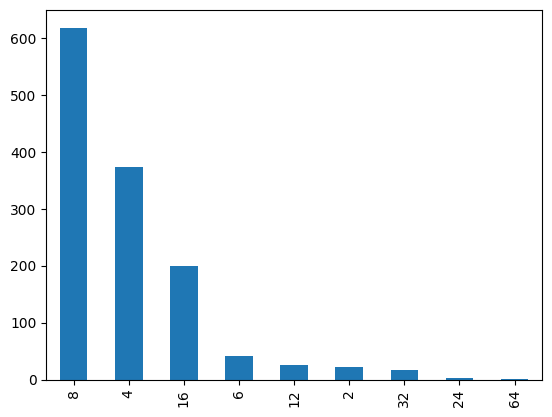

In [68]:
# now lets work on the ram and observe the correlation betweeen ram and price
print(df['Ram'].value_counts())
df['Ram'].value_counts().plot(kind="bar")
plt.show()

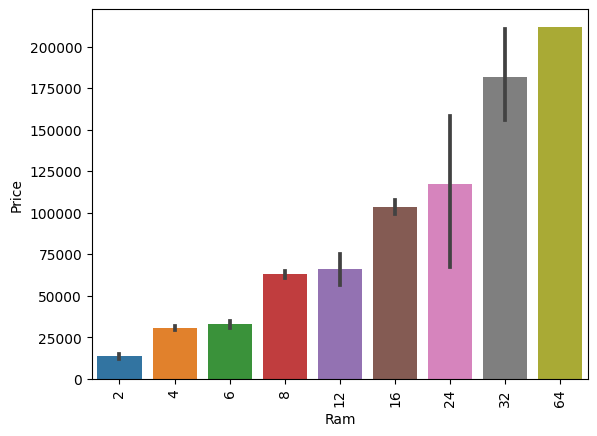

In [69]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [70]:
# lets now process the memory column
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [71]:
# this is a very diffciult column to handle due to variable properties so lets make 4 columns
# HDD, SSD, Flash_storage and Hybrid
# each of them contains the memory value in the text above

In [72]:
# there is another problem with the TB and GB we should convert everything to GB for better results


In [73]:
def extract_hdd_info(text):
    text_list= text.split(" ")
    if "HDD" in text_list:
        idx = text_list.index("HDD")
        mem= int(float(text_list[idx-1][:-2]))
        if mem < 5:
            mem= mem*1024
        return mem
    else:
        return 0
        
def extract_ssd_info(text):
    text_list= text.split(" ")
    if "SSD" in text_list:
        idx = text_list.index("SSD")
        mem= int(float(text_list[idx-1][:-2]))
        if mem < 5:
            mem= mem*1024
        return mem
    else:
        return 0
        
def extract_hybrid_info(text):
    text_list= text.split(" ")
    if "Hybrid" in text_list:
        idx = text_list.index("Hybrid")
        mem= int(float(text_list[idx-1][:-2]))
        if mem < 5:
            mem= mem*1024
        return mem
    else:
        return 0
        
def extract_flash_info(text):
    text_list= text.split(" ")
    if "Flash" in text_list:
        idx = text_list.index("Flash")
        mem= int(float(text_list[idx-1][:-2]))
        if mem < 5:
            mem= mem*1024
        return mem
    else:
        return 0

In [74]:
df['HDD']= df['Memory'].apply(extract_hdd_info)
df['SSD']= df['Memory'].apply(extract_ssd_info)
df['Hybrid']= df['Memory'].apply(extract_hybrid_info)
df['Flash_storage']= df['Memory'].apply(extract_flash_info)
df.sample(5)

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\2359874516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HDD']= df['Memory'].apply(extract_hdd_info)
C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\2359874516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SSD']= df['Memory'].apply(extract_ssd_info)
C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\2359874516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,Res_width,Res_height,PPI,Retina,Cpu_name,Cpu_clock_speed,HDD,SSD,Hybrid,Flash_storage
828,Acer,Netbook,11.6,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.350,18914.40,0,...,1366,768,135.094208,0,other Intel processors,1.6,0,0,0,32
546,Lenovo,Notebook,14.0,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.870,41824.80,0,...,1920,1080,157.350510,0,Intel Core i5,2.5,500,0,0,0
1185,Asus,Gaming,15.6,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.591,48431.52,0,...,1920,1080,141.212006,0,Intel Core i7,2.6,1024,256,0,0
164,Acer,Notebook,15.6,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.100,18541.44,0,...,1366,768,100.454666,0,other Intel processors,1.1,1024,0,0,0
328,HP,Ultrabook,12.5,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.260,71128.80,0,...,1920,1080,176.232574,0,Intel Core i7,2.7,0,256,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1302 non-null   object 
 1   TypeName         1302 non-null   object 
 2   Inches           1302 non-null   float64
 3   Ram              1302 non-null   int32  
 4   Memory           1302 non-null   object 
 5   Gpu              1302 non-null   object 
 6   OpSys            1302 non-null   object 
 7   Weight           1302 non-null   float32
 8   Price            1302 non-null   float64
 9   Touchscreen      1302 non-null   int64  
 10  IPS              1302 non-null   int64  
 11  Res_width        1302 non-null   int32  
 12  Res_height       1302 non-null   int32  
 13  PPI              1302 non-null   float32
 14  Retina           1302 non-null   int64  
 15  Cpu_name         1302 non-null   object 
 16  Cpu_clock_speed  1302 non-null   float32
 17  HDD           

In [76]:
# now lets drop the meory columns as it is being processed
df.drop(columns=["Memory"], inplace=True)
df.head()

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\872719668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Memory"], inplace=True)


,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_name,Cpu_clock_speed,HDD,SSD,Hybrid,Flash_storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002,1,Intel Core i5,2.3,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0,Intel Core i5,1.8,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.212006,0,Intel Core i5,2.5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534622,1,Intel Core i7,2.7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983002,1,Intel Core i5,3.1,0,256,0,0


In [77]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, Length: 109, dtype: int64

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64


C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\1768109172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gpu_brand']= df['Gpu'].apply(lambda x:x.split(" ")[0])


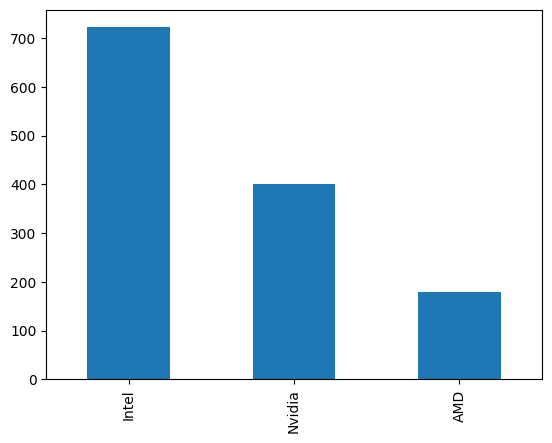

In [78]:
# from above clearly it has lot of categories no beenefit in extracting all model of gpu 
# just extact the brand of gpu because theres no memory info 
# now lets process the Gpu column
df['Gpu_brand']= df['Gpu'].apply(lambda x:x.split(" ")[0])
print(df['Gpu_brand'].value_counts())
df['Gpu_brand'].value_counts().plot(kind="bar")
plt.show()

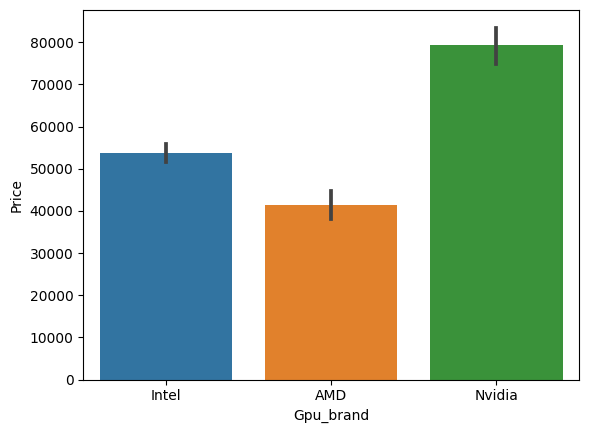

In [79]:
sns.barplot(x=df['Gpu_brand'], y=df['Price'])
plt.show()

In [80]:
# now gpu is processed so lets drop the gpu column
df.drop(columns= ["Gpu"], inplace=True)
df.head()

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\331070792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= ["Gpu"], inplace=True)


,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_name,Cpu_clock_speed,HDD,SSD,Hybrid,Flash_storage,Gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983002,1,Intel Core i5,2.3,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,0,Intel Core i5,1.8,0,0,0,128,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,1920,1080,141.212006,0,Intel Core i5,2.5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,2880,1800,220.534622,1,Intel Core i7,2.7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,2560,1600,226.983002,1,Intel Core i5,3.1,0,256,0,0,Intel


In [81]:
# now lets process the OpSys column
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

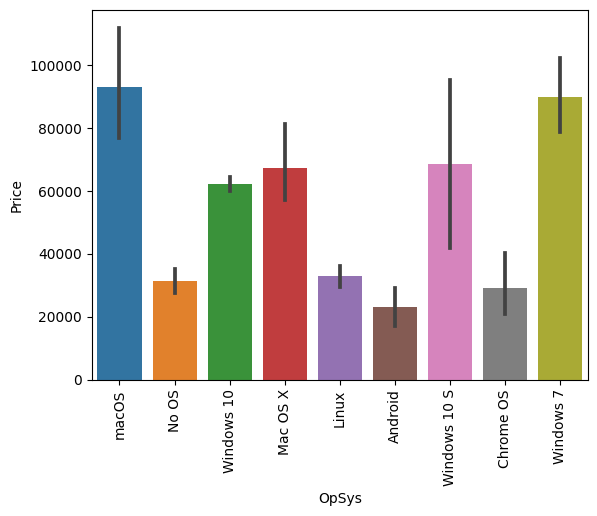

In [82]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [83]:
# From the above diagram it is clear that we can club categirues
# lets make the categories mac os, windows and linux/android/chrome os/no os

In [84]:
def cat_os(text):
    if text=="Windows 10" or text=="Windows 10 S" or text=="Windows 7":
        return "Windows"
    elif text=="macOS" or text=="Mac OS X":
        return "Mac"
    else:
        return "Linux/Android/Chrome OS/No OS"

Windows                          1125
Linux/Android/Chrome OS/No OS     156
Mac                                21
Name: OS, dtype: int64


C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\373925165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS']= df['OpSys'].apply(cat_os)


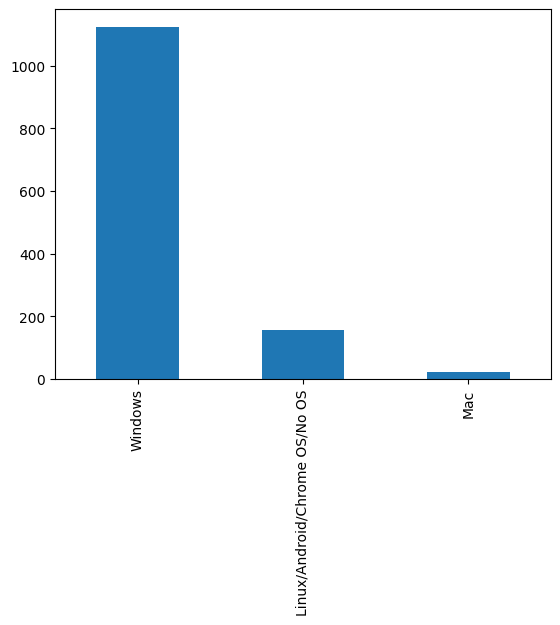

In [85]:
df['OS']= df['OpSys'].apply(cat_os)
print(df['OS'].value_counts())
df['OS'].value_counts().plot(kind="bar")
plt.show()

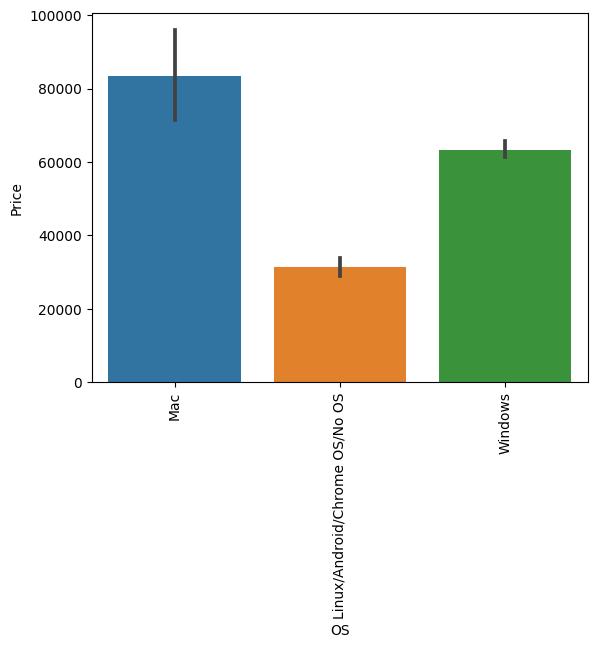

In [86]:
sns.barplot(x=df['OS'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [87]:
# now drop the opsys column
df.drop(columns=['OpSys'], inplace=True)
print(df.shape)
df.sample(5)

(1302, 20)


C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\2217241414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'], inplace=True)


,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_name,Cpu_clock_speed,HDD,SSD,Hybrid,Flash_storage,Gpu_brand,OS
989,Dell,Notebook,14.0,8,1.60,59620.32,0,0,1920,1080,157.350510,0,Intel Core i5,2.5,0,128,0,0,Intel,Windows
646,Acer,Ultrabook,14.0,8,1.80,48964.32,0,1,1920,1080,157.350510,0,Intel Core i5,2.5,0,256,0,0,Intel,Windows
741,Dell,Notebook,15.6,8,2.00,35431.20,0,0,1366,768,100.454666,0,Intel Core i3,2.0,0,256,0,0,Intel,Windows
975,HP,Notebook,15.6,8,2.04,52161.12,0,1,1920,1080,141.212006,0,Intel Core i5,2.7,1024,128,0,0,Nvidia,Windows
1161,MSI,Gaming,14.0,16,1.70,94252.32,0,0,1920,1080,157.350510,0,Intel Core i7,2.6,1024,256,0,0,Nvidia,Windows


C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\1001198953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


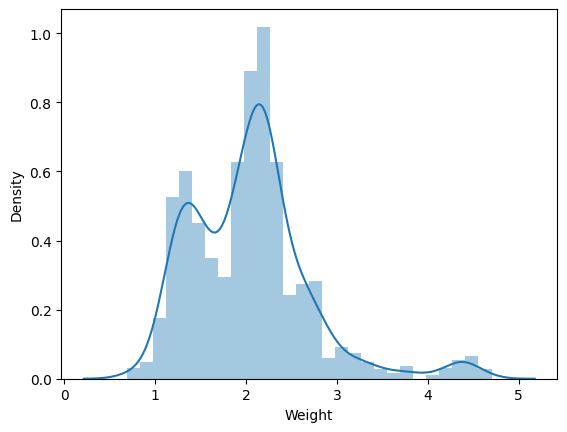

In [88]:
# weight distribution
sns.distplot(df['Weight'])
plt.show()

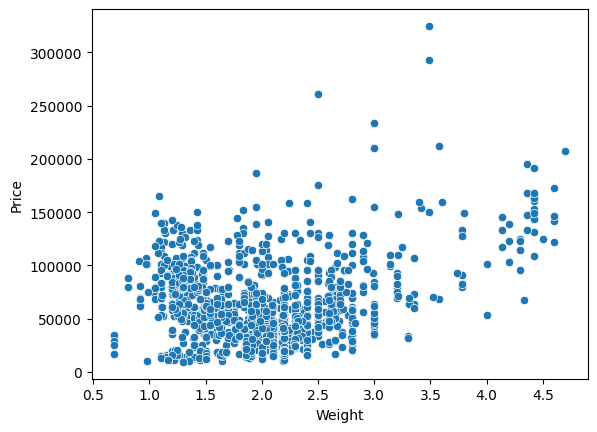

In [89]:
sns.scatterplot(x=df['Weight'], y=df['Price'])
plt.show()

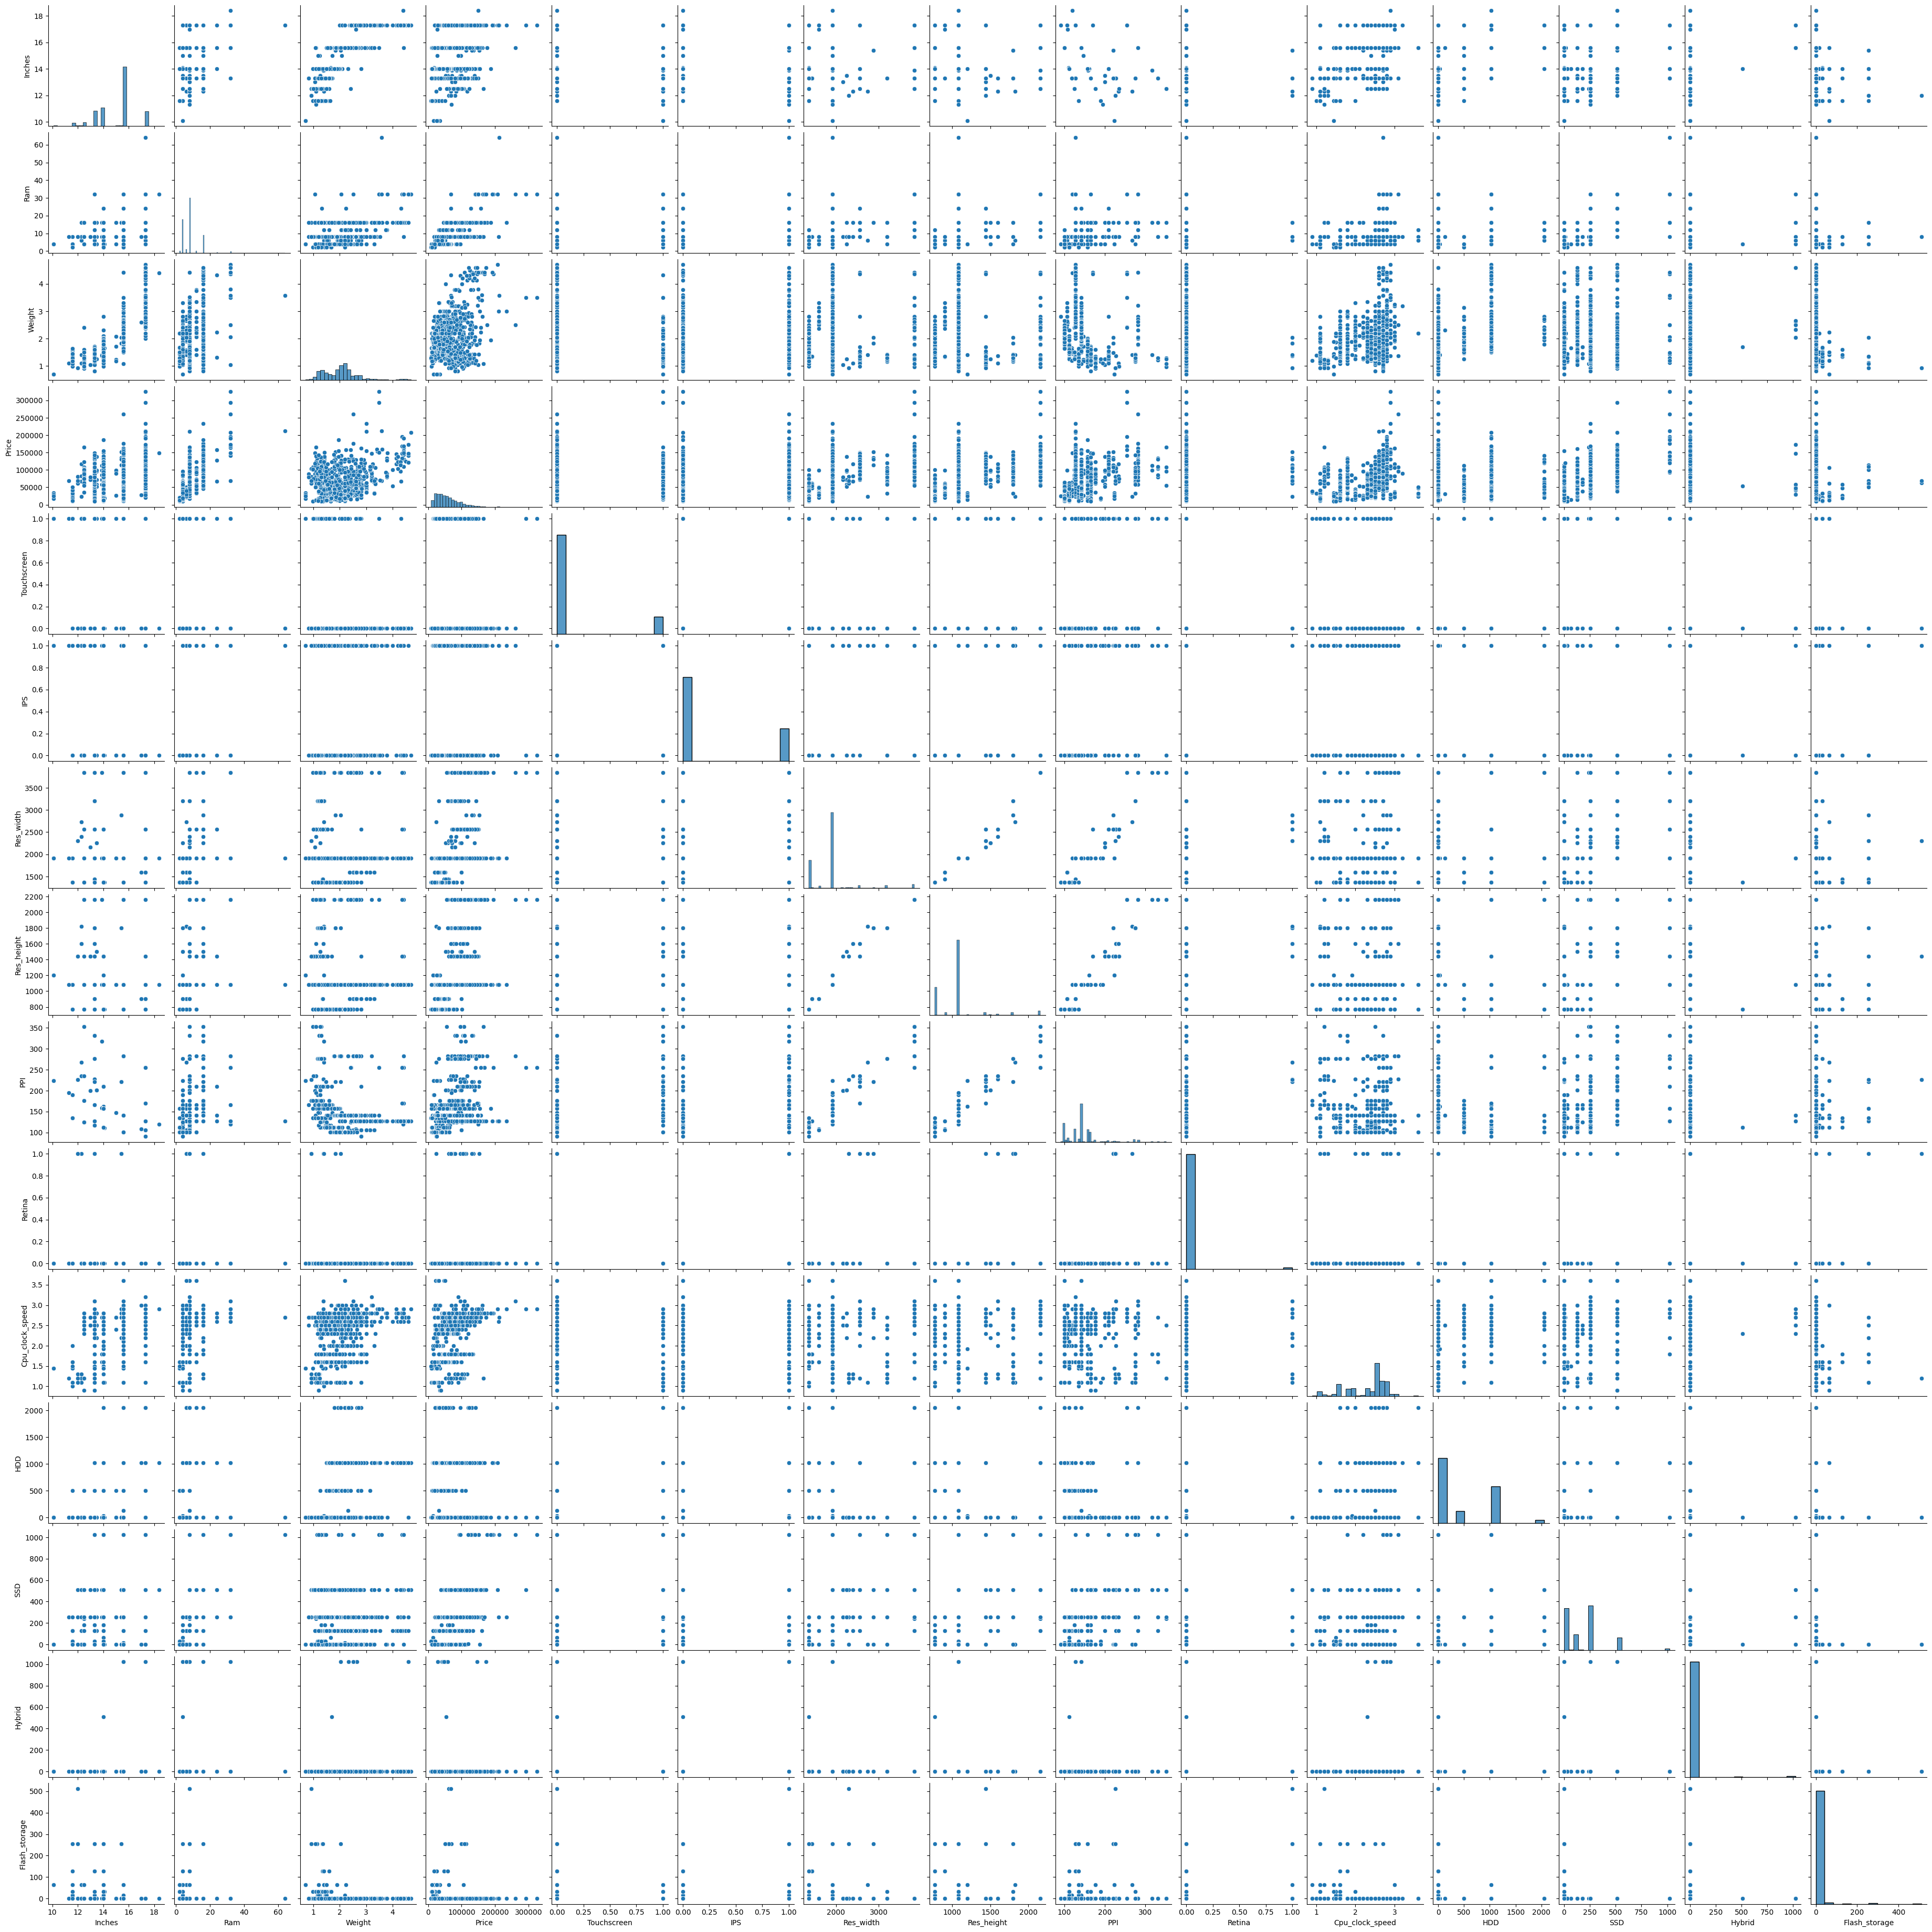

In [90]:
# lets do a paorplot of all the numerical columns in the dataset
sns.pairplot(df)
plt.show()

# CORRELATION ANALYSIS

In [91]:
# now lets do the correlation analysis 
df.corr()

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\198560378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Inches,Ram,Weight,Price,Touchscreen,IPS,Res_width,Res_height,PPI,Retina,Cpu_clock_speed,HDD,SSD,Hybrid,Flash_storage
Inches,1.000000,0.237129,0.827397,0.067329,-0.359514,-0.112726,-0.069875,-0.092934,-0.413055,-0.140740,0.307476,0.531223,-0.109818,0.054102,-0.228868
Ram,0.237129,1.000000,0.383362,0.742905,0.118875,0.207949,0.434095,0.426357,0.305688,0.031206,0.367764,0.099302,0.604520,0.038515,-0.059612
Weight,0.827397,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.031866,-0.052041,-0.321883,-0.122088,0.320090,0.515699,-0.062563,0.095223,-0.179165
Price,0.067329,0.742905,0.209867,1.000000,0.192917,0.253320,0.557369,0.554591,0.475368,0.087852,0.430122,-0.094530,0.675849,0.007963,-0.040067
Touchscreen,-0.359514,0.118875,-0.293004,0.192917,1.000000,0.148026,0.350097,0.355756,0.458571,-0.047691,-0.081681,-0.208055,0.256521,-0.039571,-0.020809
IPS,-0.112726,0.207949,0.018643,0.253320,0.148026,1.000000,0.280588,0.287404,0.299142,0.184639,0.063833,-0.091797,0.228027,-0.022456,0.068616
Res_width,-0.069875,0.434095,-0.031866,0.557369,0.350097,0.280588,1.000000,0.994480,0.931478,0.153742,0.184110,-0.123565,0.534657,0.000328,-0.017177
Res_height,-0.092934,0.426357,-0.052041,0.554591,0.355756,0.287404,0.994480,1.000000,0.939197,0.215896,0.170761,-0.134844,0.526971,-0.001306,0.014996
PPI,-0.413055,0.305688,-0.321883,0.475368,0.458571,0.299142,0.931478,0.939197,1.000000,0.216590,0.044543,-0.293747,0.514944,-0.020026,0.076479
Retina,-0.140740,0.031206,-0.122088,0.087852,-0.047691,0.184639,0.153742,0.215896,0.216590,1.000000,-0.061248,-0.092244,0.031047,-0.010977,0.397690


C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\3391327659.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


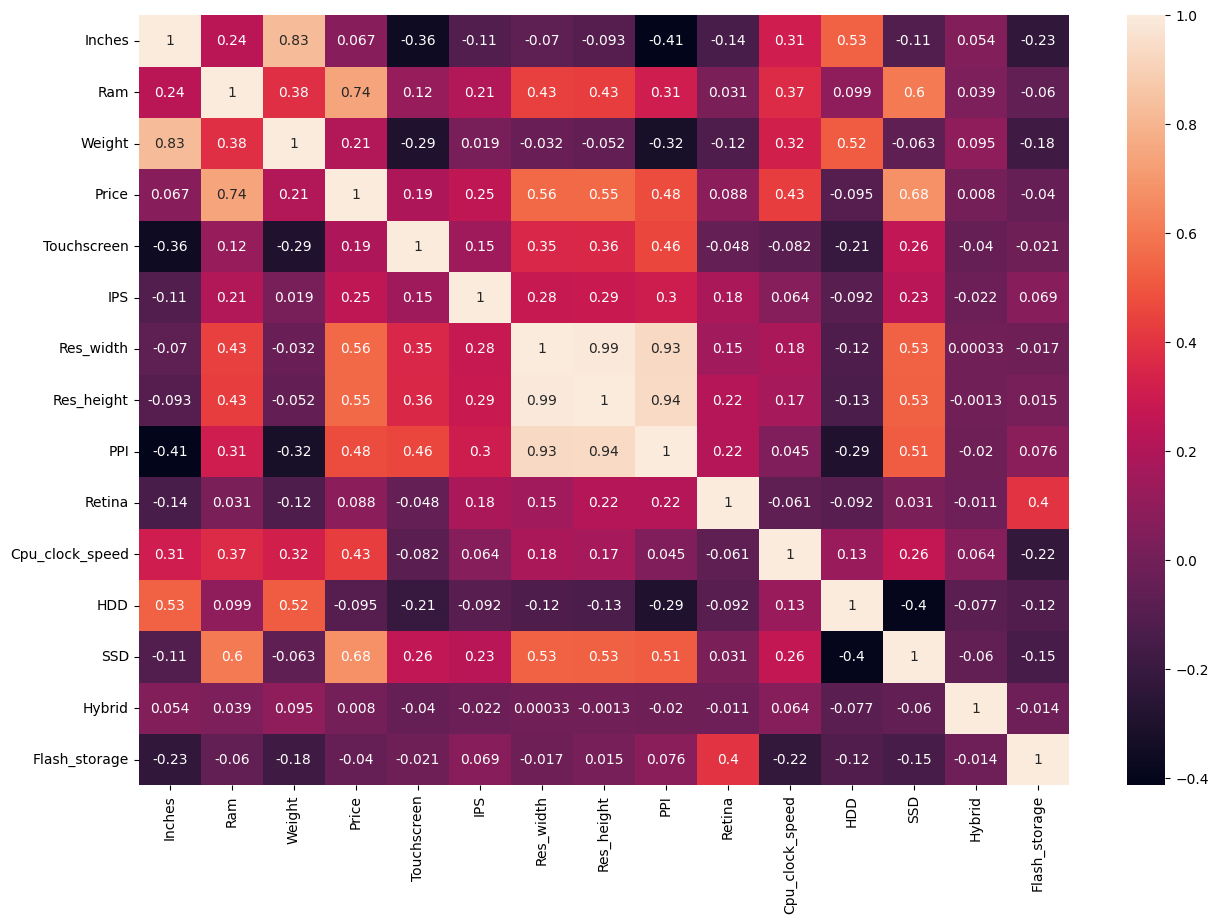

In [92]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [93]:
# from the plot above it is clear that res_height and res_width are very correlated and we already formed ppi from it so drop these columns
df.drop(columns=['Res_height', 'Res_width'], inplace=True)
print(df.shape)

(1302, 18)


C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\1513427046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Res_height', 'Res_width'], inplace=True)


C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\3391327659.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


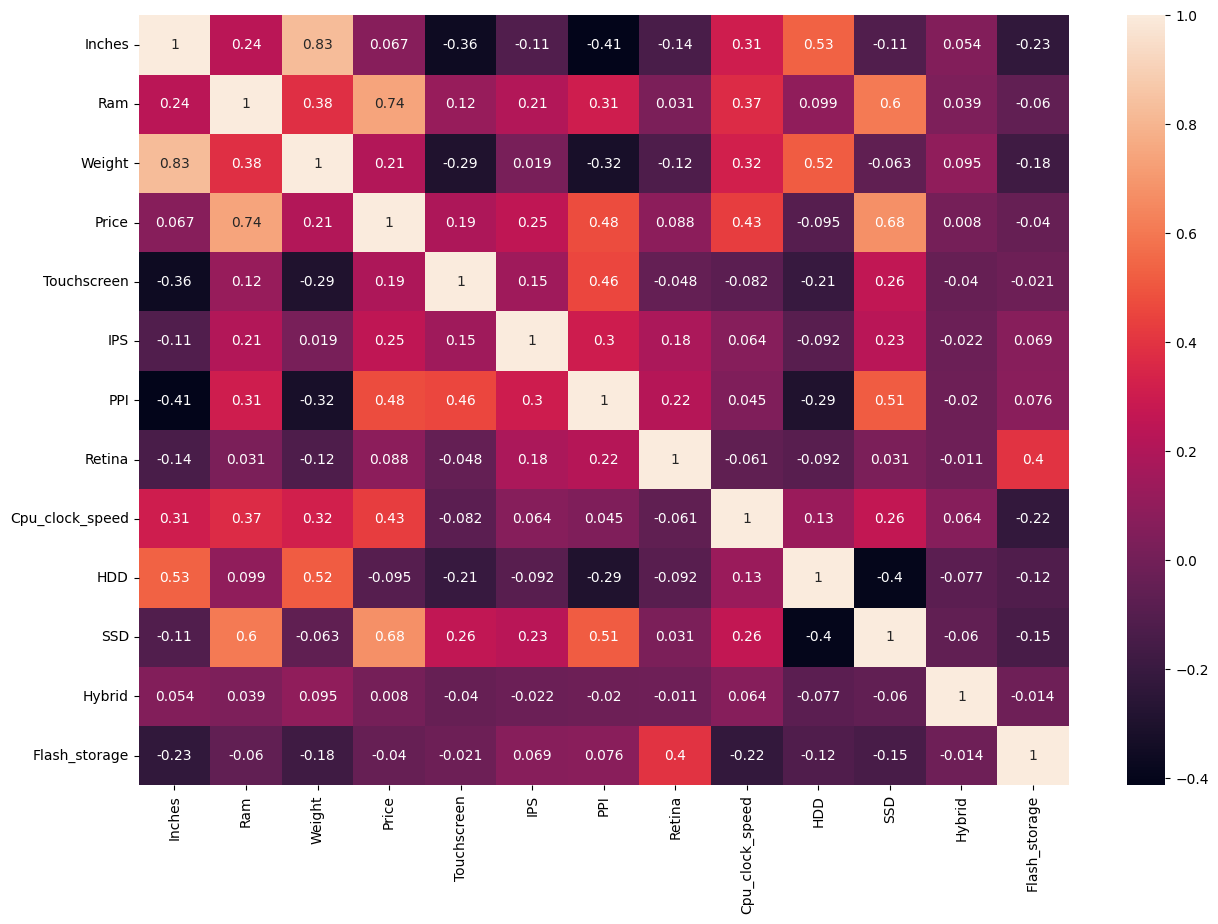

In [94]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [95]:
# some of the columns have very less correlation so lets remove those columns
df_filtered= df.drop(columns=['Hybrid', 'Flash_storage', 'HDD'], inplace=False)
df_filtered.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS,PPI,Retina,Cpu_name,Cpu_clock_speed,SSD,Gpu_brand,OS
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,1,226.983002,1,Intel Core i5,2.3,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,0,127.677940,0,Intel Core i5,1.8,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636.0000,0,0,141.212006,0,Intel Core i5,2.5,256,Intel,Linux/Android/Chrome OS/No OS
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,1,220.534622,1,Intel Core i7,2.7,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,1,226.983002,1,Intel Core i5,3.1,256,Intel,Mac


C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\2133735891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_filtered.corr(), annot=True)


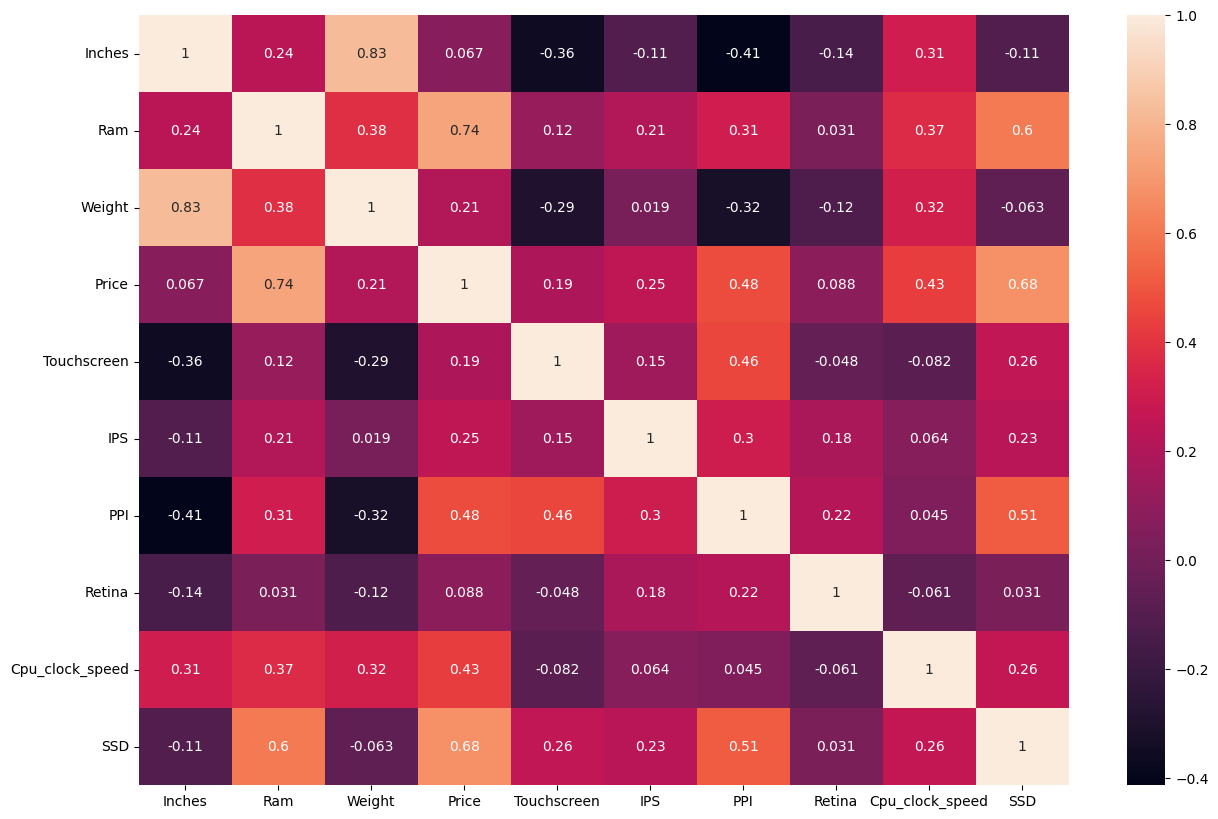

In [96]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_filtered.corr(), annot=True)
plt.show()

In [97]:
# now lets start building the pipeline for regression

# REGRESSION PIPELINE

In [98]:
# preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# pipelining
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# models
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from xgboost import XGBRegressor

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# metrics
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\540356723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


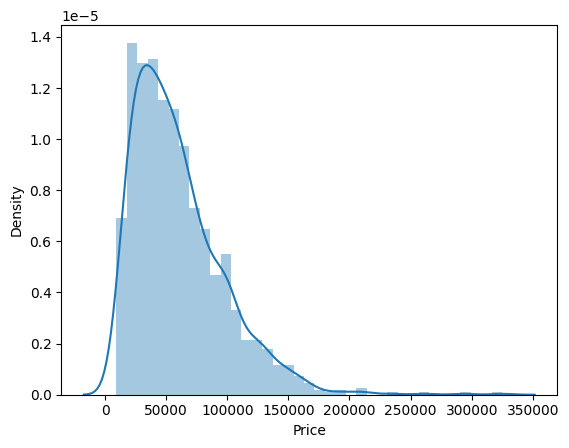

In [99]:
# target column
sns.distplot(df['Price'])
plt.show()

C:\Users\ariji\AppData\Local\Temp\ipykernel_9664\3200497929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


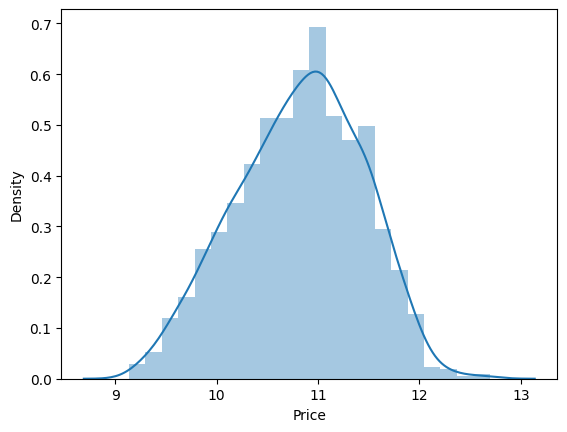

In [100]:
# so lets apply log to the price so that it is not skewed ande easy to predict
sns.distplot(np.log(df['Price']))
plt.show()

In [101]:
df_encoded= pd.get_dummies(df, columns=['Company', 'TypeName', 'Ram', 'Cpu_name', 'HDD', 'SSD', 'Hybrid','Flash_storage', 'Gpu_brand', 'OS'])
X= df_encoded.drop(columns=["Price"])
print(X.shape)
y= np.log(df_encoded['Price'])
# y= df_encoded['Price']
print(y.shape)

(1302, 82)
(1302,)


In [102]:
X.head()

,Inches,Weight,Touchscreen,IPS,PPI,Retina,Cpu_clock_speed,Company_Acer,Company_Apple,Company_Asus,...,Flash_storage_64,Flash_storage_128,Flash_storage_256,Flash_storage_512,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,OS_Linux/Android/Chrome OS/No OS,OS_Mac,OS_Windows
0,13.3,1.37,0,1,226.983002,1,2.3,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,13.3,1.34,0,0,127.677940,0,1.8,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,15.6,1.86,0,0,141.212006,0,2.5,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,15.4,1.83,0,1,220.534622,1,2.7,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,13.3,1.37,0,1,226.983002,1,3.1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [103]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [104]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1041, 82)
(261, 82)
(1041,)
(261,)


In [105]:
X.head(1)

,Inches,Weight,Touchscreen,IPS,PPI,Retina,Cpu_clock_speed,Company_Acer,Company_Apple,Company_Asus,...,Flash_storage_64,Flash_storage_128,Flash_storage_256,Flash_storage_512,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,OS_Linux/Android/Chrome OS/No OS,OS_Mac,OS_Windows
0,13.3,1.37,0,1,226.983002,1,2.3,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [106]:
# # making a column transformer
# step1= ColumnTransformer(transformers=[
#     ('col_trf', OneHotEncoder(sparse= False, drop= 'first', [0,1,3,9,11,12,13,14,15,16]))
# ], remainder='passthrough')

# step2= regression_model()
# pipe= Pipeline([
#     ('step1', step1),
#     ('step2', step2)
# ])

# pipe.fit(X_train, y_train)

# y_pred= pipe.predict(X_test)

In [107]:
# initializing all the models
svr = SVR()
lr = LinearRegression()
rlr = Ridge()
llr = Lasso()
elr = ElasticNet()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor() 
ir = IsotonicRegression()

In [337]:
def regression_pipeline(model, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False):
    results= dict()

    # transform= ColumnTransformer(transformers=[
    #     ('col_trf', OneHotEncoder(sparse= False, drop= 'first'), [0,1,3,9,11,12,13,14,15,16])
    # ], remainder='passthrough')
    
    if(model==svr):
        grid_params={'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
                     'C':[0.0001,0.001,0.01,0.1,1,10]}
    # elif(model==lr):
    #     grid_params={}
    elif(model==rlr):
        grid_params={'alpha':[0.0001,0.001,0.01,0.1,1,10]}
    elif(model==llr):
        grid_params={'alpha':[0.0001,0.001,0.01,0.1,1,10]}
    elif(model==elr):
        grid_params={'alpha':[0.0001,0.001,0.01,0.1,1,10], 
                     'l1_ratio':[0.25,0.50,0.75]}    
    elif(model==sgdr):
        grid_params={'penalty': ['l2', 'l1', 'elasticnet'], 
                     'alpha':[0.0001,0.001,0.01,0.1,1,10]}
    elif(model==knr):
        grid_params={'n_neighbors':np.arange(1,100,2), 
                     'leaf_size':np.arange(2,501)}
    elif(model==gpr):
        grid_params={'alpha':[0.0001,0.001,0.01,0.1,1,10], 
                     'normalize_y':[True, False]}
    elif(model==dtr):
        # grid_params={'criterion': ['squared_error','friedman_mse','absolute_error','poisson'], 'max_depth':np.arange(2,501), 'max_leaf_nodes':np.arange(2,501)}
        grid_params={'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
                    'splitter': ['best', 'random'],
                    'max_depth': np.arange(1, 21),  
                    'min_samples_split': np.arange(2, 21), 
                    'min_samples_leaf': np.arange(1, 11),
                    'max_features': ['sqrt', 'log2', None],
                    'max_leaf_nodes': np.arange(2, 21),
                    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}
    elif(model==gbr):
        # grid_params={'criterion': ['squared_error','friedman_mse'], 'learning_rate':[0.0001,0.001,0.01,0.1], 'n_estimators':np.arange(2,501), 'max_depth':np.arange(2,501), 'alpha':[0.0001,0.001,0.01,0.1,0.2,0.5,0.9]}
        grid_params={'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 
                     'learning_rate':[0.0001,0.001,0.01,0.1], 
                     'n_estimators':np.arange(50,501,50), 
                     'max_depth':np.arange(3,11,1), 
                     'min_samples_split': np.arange(2,20),
                     'min_samples_leaf':np.arange(1,11),
                     'subsample':np.arange(0.1,1,0.2),
                     'max_features':np.arange(0.1,1,0.2),
                     'alpha':[0.0001,0.001,0.01,0.1,0.2,0.5,0.9]}
    elif(model==rfr):
        grid_params ={'n_estimators':np.arange(50,501,50),
                    'max_depth':np.arange(3,11,1),
                    'min_samples_split': np.arange(2,20),  
                    'min_samples_leaf':np.arange(1,11),  
                    'max_features': ['log2', 'sqrt', None],
                    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                    'bootstrap':[True, False]}
    elif(model==xgbr):
        if not exhaustive:
            grid_params ={'n_estimators': [100, 200, 300, 500],  
                        'learning_rate': [0.001, 0.01, 0.05, 0.1],  
                        'max_depth': [3, 5, 7, 9, 11, 15, 19],  
                        'min_child_weight': [1, 5, 10],  
                        'subsample': [0.5, 0.7, 0.9],  
                        'colsample_bytree': [0.5, 0.7, 0.9],  
                        'gamma': [0, 0.1, 0.2],  
                        'reg_alpha': [0, 0.1, 0.5, 1],  
                        'reg_lambda': [0, 0.1, 0.5, 1],  
                        'objective': ['reg:squarederror', 'reg:squaredlogerror']}
        else:
            grid_params ={'n_estimators': [100, 200, 300, 500],  
                        'learning_rate': [0.01, 0.05, 0.1],  
                        'max_depth': [3, 5, 7, 9], 
                        'subsample': [0.5, 0.7, 0.9],  
                        'reg_alpha': [0.1, 0.5, 1],  
                        'reg_lambda': [0.1, 0.5, 1],  
                        'objective': ['reg:squarederror', 'reg:squaredlogerror']}
        
    elif(model==mlpr):
        grid_params ={'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  
                    'activation': ['relu', 'tanh', 'logistic'],  
                    'solver': ['adam', 'lbfgs', 'sgd'],  
                    'alpha': [0.001, 0.01, 0.1],  
                    'learning_rate': ['constant', 'invscaling', 'adaptive'],  
                    'learning_rate_init': [0.001, 0.01, 0.1],  
                    'batch_size': [32, 64, 128],  
                    'max_iter': [100, 200, 300],  
                    'early_stopping': [True, False]}
    else:
        grid_params={}
        
    if tuning==True and exhaustive==True:
        model= GridSearchCV(model, grid_params, scoring='r2', verbose=10, cv=5, n_jobs=-1)
    elif tuning==True and exhaustive==False:
        model= RandomizedSearchCV(model, grid_params, scoring='r2', verbose=10, cv=5, n_jobs=-1)
    elif tuning==False:
        model= GridSearchCV(model, param_grid={}, scoring='r2', verbose=10, cv=5, n_jobs=-1)

    pipe= Pipeline([
        ('step1', model)
    ])
    
    pipe.fit(X_train,y_train)
    
    y_train_pred = pipe.predict(X_train)
    results['y_train_labels']= y_train_pred
    
    #predicting the y labels for ytest
    y_test_pred= pipe.predict(X_test)
    results['y_test_labels']= y_test_pred

    # calculate train r2 score of the model
    train_r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
    results['train_r2'] = train_r2
    # print('------------------')
    # print('| Train R2 score |')
    # print('------------------')
    # print('{}\n'.format(train_r2))
    
    # calculate test r2 of the model
    test_r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
    results['test_r2'] = test_r2
    # print('-----------------')
    # print('| Test R2 score |')
    # print('-----------------')
    # print('{}\n'.format(test_r2))
    
    # calculate train mse of model
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    results['train_mse'] = train_mse
    results['train_rmse'] = train_rmse
    # print('-------------------')
    # print('| Train MSE score |')
    # print('-------------------')
    # print('{}\n'.format(train_mse))

    # calculate test mse of model
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    results['test_mse'] = test_mse
    results['test_rmse'] = test_rmse
    # print('------------------')
    # print('| Test MSE score |')
    # print('------------------')
    # print('{}\n'.format(test_mse))

     # calculate train mae score of the model
    train_mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
    results['train_mae'] = train_mae
    # print('-------------------')
    # print('| Train MAE score |')
    # print('-------------------')
    # print('{}\n'.format(train_mae))
    
    # calculate test mae of the model
    test_mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
    results['test_mae'] = test_mae
    # print('------------------')
    # print('| Test MAE score |')
    # print('------------------')
    # print('{}\n'.format(test_mae))
    
    # Average cross validated score of the best estimator, from the Grid Search 
    results['best_score'] = model.best_score_
    # print('--------------')
    # print('| Best Score |')
    # print('--------------')
    # print('{}\n'.format(model.best_score_))

    print('------------------')
    print('| Best Estimator |')
    print('------------------')
    results['best_estimator'] = model.best_estimator_
    print('{}\n'.format(model.best_estimator_))

    print('------------------------')
    print('| Best Hyperparameters |')
    print('------------------------')
    results['best_params'] = model.best_params_
    print('{}\n'.format(model.best_params_))
    
    # add the trained  model to the results
    results['model'] = model

    final_res= results.copy()
    keys_to_remove=['y_train_labels', 'y_test_labels', 'best_estimator', 'best_params', 'model']
    for key in keys_to_remove:
        final_res.pop(key)
        
    results_df = pd.DataFrame.from_dict(final_res, orient='index', columns=['values'])
    results_df= results_df.T
    
    return results, results_df

# TESTING ON RAW MODELS (WITHOUT HYPERPARAMETER TUNING)

In [173]:
# support vector regression
svr_res, svr_res_df= regression_pipeline(svr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
svr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
SVR()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.394194,0.394554,0.236182,0.485985,0.233275,0.482985,0.374411,0.376862,0.366502


In [174]:
# linear regression
lr_res, lr_res_df= regression_pipeline(lr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
lr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
LinearRegression()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.87698,0.833182,0.047961,0.219,0.064274,0.253523,0.172885,0.198639,0.845722


In [175]:
# lasso linear regression (L1 norm)
llr_res, llr_res_df= regression_pipeline(llr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
llr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
Lasso()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.225839,0.263064,0.301817,0.549379,0.283937,0.532857,0.437771,0.416398,0.215906


In [176]:
# lasso linear regression (L2 norm)
rlr_res, rlr_res_df= regression_pipeline(rlr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
rlr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
Ridge()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.875449,0.836264,0.048558,0.220358,0.063087,0.25117,0.174885,0.197662,0.850255


In [177]:
# elasticnet linear regression (both L1 and L2 norm)
elr_res, elr_res_df= regression_pipeline(elr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
elr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
ElasticNet()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.226902,0.26448,0.301403,0.549002,0.283391,0.532345,0.437032,0.4165,0.216593


In [180]:
# stochastic gradient descent regression
sgdr_res, sgdr_res_df= regression_pipeline(sgdr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
sgdr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
SGDRegressor()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,-1.665139e+25,-1.656626e+25,6.491777e+24,2.547897e+12,6.382874e+24,2.526435e+12,2.420392e+12,2.381247e+12,-1.450481e+26


In [181]:
# KNN regression
knr_res, knr_res_df= regression_pipeline(knr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
knr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
KNeighborsRegressor()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.887451,0.819416,0.043879,0.209473,0.069578,0.263776,0.153626,0.202335,0.805672


In [182]:
# gaussian process regression 
gpr_res, gpr_res_df= regression_pipeline(gpr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
gpr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
GaussianProcessRegressor()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.997576,-58.201574,0.000945,0.030739,22.809992,4.775981,0.006766,3.044833,-78.74838


In [183]:
# gaussian process regression 
dtr_res, dtr_res_df= regression_pipeline(dtr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
dtr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
DecisionTreeRegressor()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.997576,0.79715,0.000945,0.030739,0.078157,0.279565,0.006763,0.189438,0.774208


In [185]:
# gradient boosting regression 
gbr_res, gbr_res_df= regression_pipeline(gbr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
gbr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
GradientBoostingRegressor()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.918129,0.87266,0.031918,0.178657,0.049063,0.221502,0.140884,0.171687,0.87125


In [187]:
# XGBoost regression 
rfr_res, rfr_res_df= regression_pipeline(rfr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
rfr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
RandomForestRegressor()

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.982951,0.868261,0.006647,0.081527,0.050758,0.225295,0.05984,0.163457,0.873141


In [186]:
# XGBoost regression 
xgbr_res, xgbr_res_df= regression_pipeline(xgbr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=False)
xgbr_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
------------------
| Best Estimator |
------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

------------------------
| Best Hyperparameters |
------------------------
{}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.988377,0.898102,0.004531,0.067315,0.039261,0.198143,0.046603,0.146226,0.892082


# HYPERPARAMETER TUNING (RANDOM SEARCH WITH CROSS VALIDATION)

In [190]:
# the best permorming model out of all the raw models is the XGBoost regressor followed by gradient boosting rgressor.
# now lets start tuning the models and observe how much it improves the performance

In [191]:
# support vector regression
svr_res, svr_res_df= regression_pipeline(svr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
svr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------------
| Best Estimator |
------------------
SVR(C=0.1, kernel='linear')

------------------------
| Best Hyperparameters |
------------------------
{'kernel': 'linear', 'C': 0.1}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.869228,0.836029,0.050983,0.225795,0.063177,0.25135,0.177926,0.199607,0.846083


In [195]:
# lasso linear regression (L1 norm)
llr_res, llr_res_df= regression_pipeline(llr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
llr_res_df

C:\Users\ariji\Anaconda3\envs\python310\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
------------------
| Best Estimator |
------------------
Lasso(alpha=0.0001)

------------------------
| Best Hyperparameters |
------------------------
{'alpha': 0.0001}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.876554,0.836895,0.048127,0.219379,0.062844,0.250686,0.174055,0.197571,0.847885


In [196]:
# lasso linear regression (L2 norm)
rlr_res, rlr_res_df= regression_pipeline(rlr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
rlr_res_df

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\ariji\Anaconda3\envs\python310\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


------------------
| Best Estimator |
------------------
Ridge(alpha=1)

------------------------
| Best Hyperparameters |
------------------------
{'alpha': 1}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.875449,0.836264,0.048558,0.220358,0.063087,0.25117,0.174885,0.197662,0.850255


In [197]:
# elasticnet linear regression (both L1 and L2 norm)
elr_res, elr_res_df= regression_pipeline(elr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
elr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ariji\Anaconda3\envs\python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.038e-02, tolerance: 3.158e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\ariji\Anaconda3\envs\python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.185e-02, tolerance: 3.282e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\ariji\Anaconda3\envs\python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

------------------
| Best Estimator |
------------------
ElasticNet(alpha=0.001, l1_ratio=0.25)

------------------------
| Best Hyperparameters |
------------------------
{'l1_ratio': 0.25, 'alpha': 0.001}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.872697,0.83791,0.049631,0.22278,0.062452,0.249904,0.177471,0.197952,0.847871


In [200]:
# stochastic gradient descent regression
sgdr_res, sgdr_res_df= regression_pipeline(sgdr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
sgdr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------------
| Best Estimator |
------------------
SGDRegressor(alpha=0.01)

------------------------
| Best Hyperparameters |
------------------------
{'penalty': 'l2', 'alpha': 0.01}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,-1.619676e+26,-1.612799e+26,6.314530e+25,7.946402e+12,6.214012e+25,7.882901e+12,7.538280e+12,7.413682e+12,-1.198122e+26


In [222]:
# KNN regression
knr_res, knr_res_df= regression_pipeline(knr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
knr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------------
| Best Estimator |
------------------
KNeighborsRegressor(leaf_size=49, n_neighbors=21)

------------------------
| Best Hyperparameters |
------------------------
{'n_neighbors': 21, 'leaf_size': 49}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.776636,0.734919,0.087082,0.295096,0.102134,0.319584,0.217209,0.244118,0.7261


In [223]:
# gaussian process regression 
gpr_res, gpr_res_df= regression_pipeline(gpr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
gpr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------------
| Best Estimator |
------------------
GaussianProcessRegressor(alpha=0.1, normalize_y=True)

------------------------
| Best Hyperparameters |
------------------------
{'normalize_y': True, 'alpha': 0.1}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.986458,0.655667,0.00528,0.072661,0.132669,0.364238,0.04777,0.259594,0.657657


In [282]:
# decision tree regression 
dtr_res, dtr_res_df= regression_pipeline(dtr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
dtr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------------
| Best Estimator |
------------------
DecisionTreeRegressor(max_depth=12, max_leaf_nodes=16, min_samples_leaf=3,
                      min_samples_split=18)

------------------------
| Best Hyperparameters |
------------------------
{'splitter': 'best', 'min_samples_split': 18, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 16, 'max_features': None, 'max_depth': 12, 'criterion': 'squared_error'}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.803746,0.71987,0.076512,0.276608,0.107932,0.328531,0.215918,0.252612,0.761615


In [297]:
# gradient boosting regression 
gbr_res, gbr_res_df= regression_pipeline(gbr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
gbr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------------
| Best Estimator |
------------------
GradientBoostingRegressor(alpha=0.2, max_depth=8,
                          max_features=0.7000000000000001, min_samples_leaf=5,
                          min_samples_split=18, n_estimators=50,
                          subsample=0.5000000000000001)

------------------------
| Best Hyperparameters |
------------------------
{'subsample': 0.5000000000000001, 'n_estimators': 50, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 0.7000000000000001, 'max_depth': 8, 'loss': 'squared_error', 'learning_rate': 0.1, 'alpha': 0.2}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.947765,0.880422,0.020365,0.142705,0.046073,0.214645,0.108844,0.153972,0.885853


In [298]:
# XGBoost regression 
rfr_res, rfr_res_df= regression_pipeline(rfr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
rfr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------------
| Best Estimator |
------------------
RandomForestRegressor(bootstrap=False, max_depth=10, max_features=None,
                      min_samples_split=9, n_estimators=300)

------------------------
| Best Hyperparameters |
------------------------
{'n_estimators': 300, 'min_samples_split': 9, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_features': None, 'max_depth': 10, 'bootstrap': False}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.926922,0.816738,0.028491,0.168792,0.07061,0.265725,0.125797,0.18887,0.801551


In [326]:
# XGBoost regression 
xgbr_res, xgbr_res_df= regression_pipeline(xgbr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
xgbr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------------
| Best Estimator |
------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

------------------------
| Best Hyperparameters |
------------------------
{'subsample': 0.5, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'objective': 'reg:

,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.965518,0.903645,0.013443,0.115945,0.037125,0.192679,0.092661,0.143572,0.898658


In [327]:
# mlp regressor
mlpr_res, mlpr_res_df= regression_pipeline(mlpr, X_train, y_train, X_test, y_test, exhaustive=False, tuning=True)
mlpr_res_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ariji\Anaconda3\envs\python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ariji\Anaconda3\envs\python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ariji\Anaconda3\envs\python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ariji\Anaconda3\envs\python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752,

------------------
| Best Estimator |
------------------
MLPRegressor(activation='logistic', alpha=0.001, batch_size=32,
             early_stopping=True, learning_rate='adaptive',
             learning_rate_init=0.01, max_iter=300)

------------------------
| Best Hyperparameters |
------------------------
{'solver': 'adam', 'max_iter': 300, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'early_stopping': True, 'batch_size': 32, 'alpha': 0.001, 'activation': 'logistic'}



,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.868316,0.81946,0.051339,0.226581,0.069561,0.263744,0.178056,0.204573,0.84578


# HYPERPARAMETER TUNING (GRID SEARCH WITH CROSS VALIDAITON)

In [328]:
# as the results of the models like dtr, gbr, rfr, xgbr are not stable and varies a lot lets apply grid search cv on them
# applying grid search cv we can explore the whole space of solutions and can get the optimal solution
# as rest of them remains almost the same therefore we need not apply grid search cv on them

In [329]:
# we get the best results from xgbr in the random search cv so doing grid search cv we can find the best solution

In [338]:
#XGBoost regression
xgbr_res, xgbr_res_df= regression_pipeline(xgbr, X_train, y_train, X_test, y_test, exhaustive=True, tuning=True)
xgbr_res_df

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
------------------
| Best Estimator |
------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

------------------------
| Best Hyperparameters |
------------------------
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'o

,train_r2,test_r2,train_mse,train_rmse,test_mse,test_rmse,train_mae,test_mae,best_score
values,0.980943,0.915539,0.007429,0.086194,0.032542,0.180395,0.064258,0.13365,0.903766
